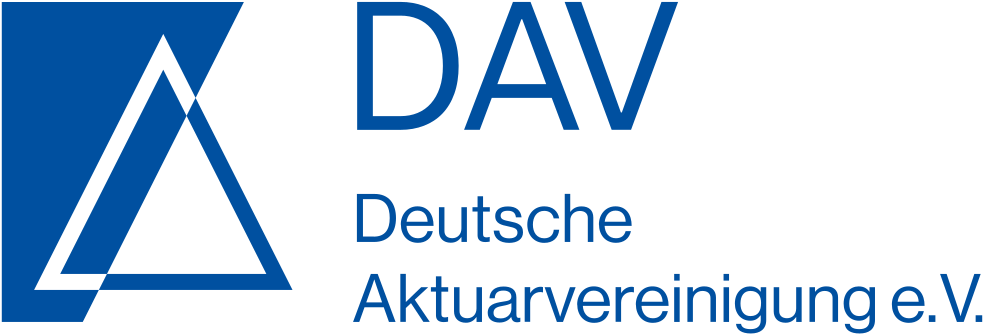
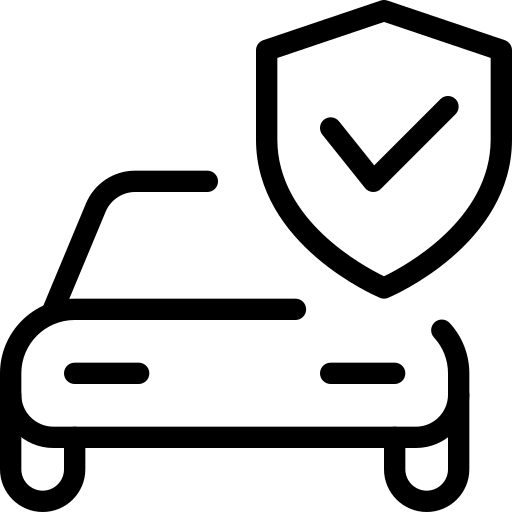

<p style="font-size:19px; text-align:left; margin-top:    25px;"><i>German Association of Actuaries (DAV) — Working Group "Explainable Artificial Intelligence"</i></p>
<p style="font-size:25px; text-align:left; margin-bottom: 15px"><b>Model-Agnostic Explainability Methods for Binary Classification Problems:<br>
A Case Study on Car Insurance Data</b></p>
<p style="font-size:19px; text-align:left; margin-bottom: 15px; margin-bottom: 25px">Dr. Simon Hatzesberger (<a href="mailto:simon.hatzesberger@gmail.com">simon.hatzesberger@gmail.com</a>)

<hr style="width:50%;">
<p style="font-size:16px; font-style:italic; margin-left:10%; margin-right:10%; margin-bottom: 1em;">
In this Jupyter notebook, we offer a comprehensive walkthrough for actuaries and data scientists on applying model-agnostic explainability methods to binary classification tasks, using a car insurance dataset as our case study. With the growing prevalence of modern black box machine learning models, which often lack the interpretability of classical statistical models, these explainability methods become increasingly important to ensure transparency and trust in predictive modeling.
</p>
<p style="font-size:16px; font-style:italic; margin-left:10%; margin-right:10%; margin-top: 1em; margin-bottom: 1em;">
We illuminate both global methods – such as global surrogate models, PDPs, ALE plots, and permutation feature importances – for a thorough understanding of model behavior, and local methods – like SHAP, LIME, ICE plots, counterfactual explanations, and anchors – for detailed insights on individual predictions.
</p>
<p style="font-size:16px; font-style:italic; margin-left:10%; margin-right:10%; margin-top: 1em;">
In addition to concise overviews of these methods, the notebook provides practical code examples that readers can easily adopt, offering a user-friendly introduction to explainable artificial intelligence.
<hr style="width:50%;">

<h1 style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">Table of Contents</h1>

[1. Introduction](#introduction)

[2. Brief Exploratory Data Analysis](#brief-exploratory-data-analysis)

[3. Developing and Evaluating a Black Box Machine Learning Model](#developing-and-evaluating-black-box-model)

[4. Global Model-Agnostic Explainability Methods](#global-explainability-methods)<br>
&emsp;&emsp;&emsp;[4.1 Global Surrogate Model](#global-surrogate-model)<br>
&emsp;&emsp;&emsp;[4.2 Partial Dependence Plot (PDP)](#partial-dependence-plot)<br>
&emsp;&emsp;&emsp;[4.3 Accumulated Local Effects (ALE)](#accumulated-local-effects)<br>
&emsp;&emsp;&emsp;[4.4 Permutation Feature Importance (PFI)](#permutation-feature-importance)

[5. Local Model-Agnostic Explainability Methods](#local-explainability-methods)<br>
&emsp;&emsp;&emsp;[5.1 Shapley Additive Explanations (SHAP)](#shapley-additive-explanations)<br>
&emsp;&emsp;&emsp;[5.2 Local Interpretable Model-Agnostic Explanations (LIME)](#local-interpretable-model-agnostic-explanations)<br>
&emsp;&emsp;&emsp;[5.3 Individual Conditional Expectation (ICE)](#individual-conditional-expectation)<br>
&emsp;&emsp;&emsp;[5.4 Counterfactual Explanations](#counterfactual-explanations)<br>
&emsp;&emsp;&emsp;[5.5 Anchors](#anchors)

[6. Limitations and Outlook](#limitations-and-outlook)

[A. Appendix](#appendix)<br>
&emsp;&emsp;&emsp;[A.1 Adapting this Notebook's Code to Other Machine Learning Models](#adapting-code-to-other-ml-models)<br>
&emsp;&emsp;&emsp;[A.2 Deep Dive: PDP vs. ALE](#deep-dive-pdp-vs-ale)<br>
&emsp;&emsp;&emsp;[A.3 Deep Dive: Diverse Feature Importance Methods](#deep-dive-feature-importance-methods)<br>
&emsp;&emsp;&emsp;[A.4 Deep Dive: Variants of SHAP](#deep-dive-shap-variants)

[References](#references)

<h1 id="introduction" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">1. Introduction</h1>

The primary objective of this notebook is to showcase a variety of techniques for interpreting the internal workings and predictive behavior of machine learning models in binary classification problems. Our goal is to deliver insights that span two critical levels of model understanding: the general workings of a machine learning model, which we refer to as global explainability, and the specific factors driving individual predictions, known as local explainability. Implementing these forms of explainable artificial intelligence (XAI) is crucial, as it empowers stakeholders – including model developers, regulatory bodies, and executive management – to make well-informed decisions rather than relying on black box models. Readers are encouraged to apply – or at least find inspiration in – the approaches and code snippets that will be shared in this work.

Throughout this case study, we analyze a slightly modified version of the synthetic dataset on car insurance found in [[1]](#references_1). Our classification problem is to predict whether an insurance policyholder will incur a claim based on individual risk factors and vehicle-related attributes. These features include age, driving experience, credit score, annual mileage, vehicle ownership, and an indicator of the vehicle's age. We aim to shed light on the model's decision-making process with model-agnostic explainability methods, rather than solely maximizing the predictive accuracy. Therefore, we apply these methods to a CatBoost model for practical illustration. Note that we focus on model-agnostic methods rather than model-specific methods that are tailored to particular models. This choice ensures the techniques we discuss can be broadly applied across different machine learning models, offering greater flexibility and wider applicability.

The remainder of this notebook is as follows. [Section 2](#brief-exploratory-data-analysis) contains a brief exploratory data analysis (EDA) of the car insurance dataset, acquainting us with the data and its predictive features. [Section 3](#developing-and-evaluating-black-box-model) covers the training and evaluation process of the CatBoost machine learning model as applied to our classification problem. [Section 4](#global-explainability-methods) introduces global model-agnostic explainability techniques, specifically examining global surrogate models ([Subsection 4.1](#global-surrogate-model)), Partial Dependence Plots (PDP, [Subsection 4.2](#partial-dependence-plot)), Accumulated Local Effects (ALE, [Subsection 4.3](#accumulated-local-effects)), and Permutation Feature Importance (PFI, [Subsection 4.4](#permutation-feature-importance)). [Section 5](#local-explainability-methods) contrasts this global perspective with local explainability methods such as Shapley Additive Explanations (SHAP, [Subsection 5.1](#shapley-additive-explanations)), Local Interpretable Model-Agnostic Explanations (LIME, [Subsection 5.2](#local-interpretable-model-agnostic-explanations)), Individual Conditional Expectations (ICE, [Subsection 5.3](#individual-conditional-expectation)), counterfactual explanations ([Subsection 5.4](#counterfactual-explanations)), and anchors ([Subsection 5.5](#anchors)). [Section 6](#limitations-and-outlook) concludes the notebook by discussing the limitations of our case study and presenting perspectives on future work. Finally, the [Appendix](#appendix) provides a technical guide on applying XAI methods to machine learning models that do not inherently handle categorical features ([Appendix A.1](#adapting-code-to-other-ml-models)). It also includes deep dives into selected topics: a comparison between PDPs and ALE plots ([Appendix A.2](#deep-dive-pdp-vs-ale)), diverse feature importance methods ([Appendix A.3](#deep-dive-feature-importance-methods)), and variants of SHAP ([Appendix A.4](#deep-dive-shap-variants)).

<h1 id="brief-exploratory-data-analysis" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">2. Brief Exploratory Data Analysis</h1>

Before diving into a brief exploratory data analysis (EDA), we import all libraries that are used throughout this notebook, define global constants, and set a random seed to ensure consistency and reproducibility.

In [1]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for model development, evaluation, and preprocessing
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# Libraries for model explainability
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
import shap
shap.initjs()
from PyALE import ale
from lime.lime_tabular import LimeTabularExplainer
import dice_ml
from alibi.explainers import AnchorTabular
from alibi.utils import gen_category_map

# Libraries for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations for pandas display options and matplotlib inline backend
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

# Color palette for visualizations
COLOR_LIGHT, COLOR_DARK, COLOR_GREY = '#4BB9E6', '#0050A0', '#7f7f7f'

# Global constants and settings
TRAIN_RATIO = 0.70   # Ratio for splitting data into training and test sets
RANDOM_SEED = 12345  # Seed for reproducibility of random operations

# Configuration for warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Blowfish has been deprecated


For initial insights into the car insurance dataset, we conduct a basic EDA. We begin by loading the dataset, inspecting the first ten entries, and reviewing the overall structure, including the number of rows, columns, and any missing values, to provide a concise overview of the data.

In [2]:
# Load the car insurance dataset
df_raw = pd.read_csv('CarInsurance.csv')

# Output the dimensions of the dataset and the total number of missing values
num_entries = df_raw.shape[0]
num_features = df_raw.shape[1]
total_missing = df_raw.isnull().sum().sum()

print(f"The dataset contains {num_entries} entries and {num_features} features.")
print(f"There are {total_missing} missing values in the dataset.")

# Display the first ten entries to preview the data
df_raw.head(10)

The dataset contains 8149 entries and 7 features.
There are 0 missing values in the dataset.


AGE DRIVINGEXPERIENCE  CREDITSCORE  ANNUALMILEAGE VEHICLEOWNERSHIP  \
0   73              0-9y       0.6290        12000.0              yes   
1   16              0-9y       0.3578        16000.0               no   
2   18              0-9y       0.4931        11000.0              yes   
3   21              0-9y       0.2060        11000.0              yes   
4   29            10-19y       0.3884        12000.0              yes   
5   45            20-29y       0.6191        13000.0              yes   
6   73              30+y       0.4929        13000.0               no   
7   28              0-9y       0.4687        14000.0               no   
8   55            20-29y       0.5218        13000.0               no   
9   54              0-9y       0.5615        11000.0              yes   

  VEHICLEMANUFACTURE  CLAIM  
0          since2015      0  
1         before2015      1  
2         before2015      0  
3         before2015      0  
4         before2015      1  
5          since2015      0  
6          since2015      0  
7          since2015      1  
8         before2015      0  
9         before2015      1

The dataset includes a variety of personal and vehicle-related attributes, with the goal of predicting whether an individual will file a claim. Below are concise descriptions of these features and the target variable for a clear understanding of the dataset's contents:

* `AGE`: The age of the individual policyholder.
* `DRIVINGEXPERIENCE`: The total driving experience of the policyholder categorized into the ranges '0-9y' (0 to 9 years), '10-19y' (10 to 19 years), '20-29y' (20 to 29 years), and '30y+' (30 years or more).
* `CREDITSCORE`: A numerical representation of the policyholder's creditworthiness, with values ranging between 0 (poor credit) and 1 (excellent credit).
* `ANNUALMILEAGE`: The total number of miles the policyholder drives annually (rounded).
* `VEHICLEOWNERSHIP`: Indicates whether the policyholder owns the vehicle ('yes') or not ('no').
* `VEHICLEMANUFACTURE`: Specifies the manufacturing year range of the policyholder's vehicle, simplified as '≥2015' for vehicles made in or after the year 2015, and '&lt;2015' for vehicles made before the year 2015.
* `CLAIM`: The target variable, indicating whether the policyholder filed a claim (1) or not (0).

In binary classification, it is important to check the balancedness of the dataset. A highly imbalanced dataset can affect model performance, so we will calculate the relative frequency of `CLAIM` being 1 in the following.

In [3]:
# Check the balancedness by calculating the relative frequency of CLAIM = 1
claim_frequency = df_raw['CLAIM'].mean()
print(f"The relative frequency of CLAIM = 1 is {claim_frequency:.2%}.")

The relative frequency of CLAIM = 1 is 31.12%.


Hence, we have a dataset with moderate imbalance that, at least in our case study, does not require any imbalance reduction techniques such as subsampling or oversampling.

In the following, histograms and boxplots are used to illustrate the distribution of each numerical variable, namely `AGE`, `CREDITSCORE`, and `ANNUALMILEAGE`.

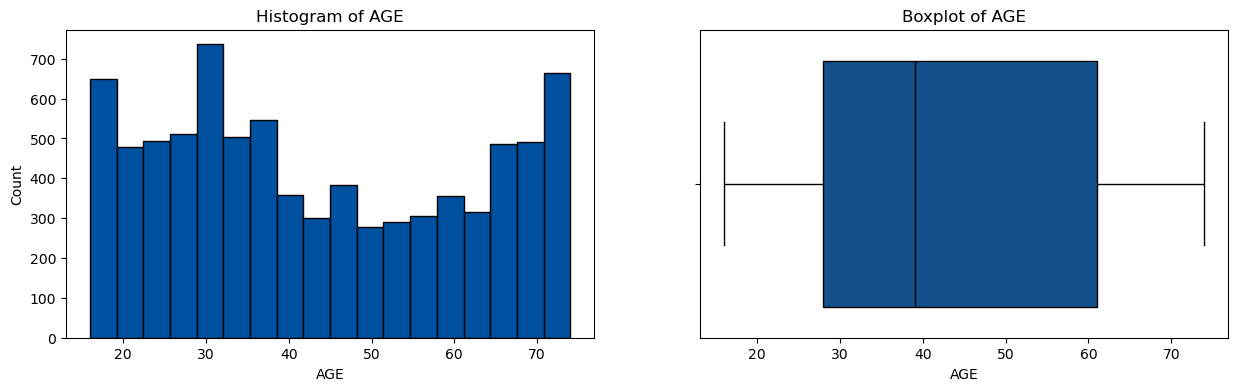

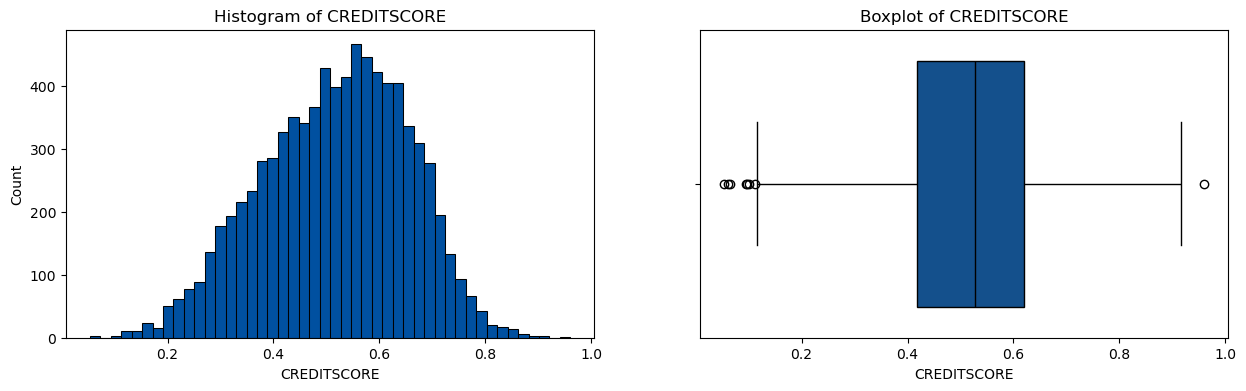

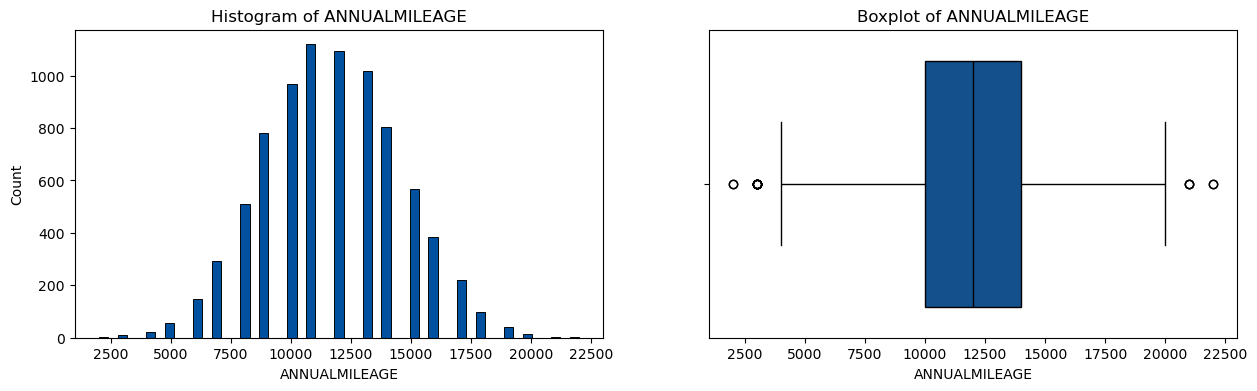

In [4]:
# List of numerical columns in the dataset
numerical_features = ['AGE', 'CREDITSCORE', 'ANNUALMILEAGE']

# Plot histograms and boxplots for each numerical feature
for col in numerical_features:
    # Create a new figure with a specific size
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    # Histogram: distribution of the feature
    sns.histplot(df_raw[col], ax=ax[0], color=COLOR_DARK, edgecolor='black', 
                 alpha=1)
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    # Boxplot: spread of the feature
    sns.boxplot(x=df_raw[col], ax=ax[1], color=COLOR_DARK, 
                linecolor='black')
    ax[1].set_title(f'Boxplot of {col}')
    ax[1].set_xlabel(col)

    # Display all plots
    plt.show()

Next, we produce Kernel Density Estimation (KDE) plots to compare the distributions of each numerical feature for different values of the `CLAIM` target variable, which can reveal tendencies of features associated with higher claim rates. From these figures, we can identify which features might be strong predictors of claims and observe any significant differences in distributions between the classes.

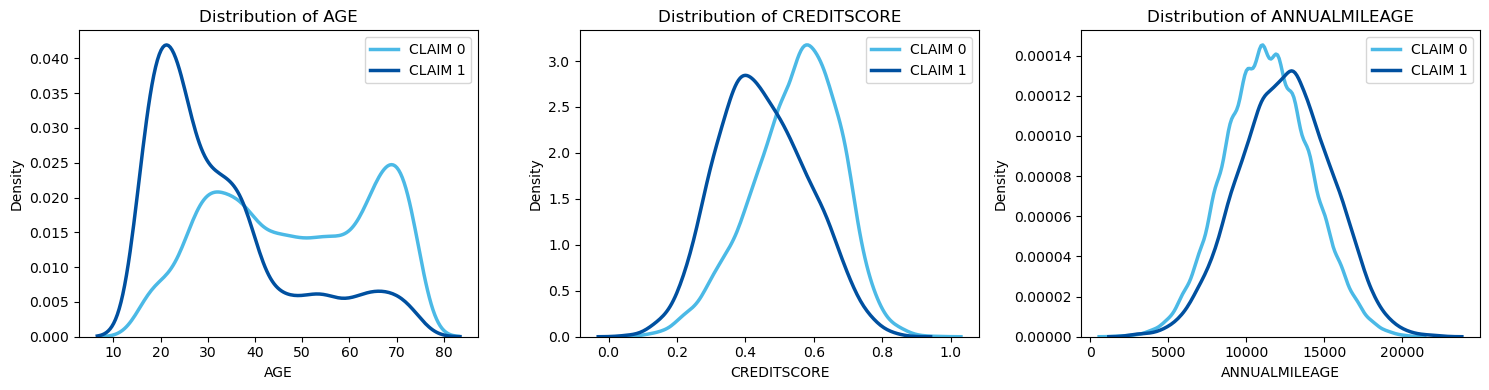

In [5]:
# Number of plots, set up the subplot grid
n_plots = len(numerical_features)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through the list of numerical features
for idx, feature in enumerate(numerical_features):
    ax = plt.subplot(n_rows, n_cols, idx + 1)

    # Create a color mapping based on TARGET values assuming values are 0 and 1
    color_mapping = {0: COLOR_LIGHT, 1: COLOR_DARK}

    class_vals = df_raw['CLAIM'].unique()
    for val in class_vals:
        subset = df_raw[df_raw['CLAIM'] == val]

        # Draw the KDE for each class
        sns.kdeplot(subset[feature], ax=ax, label=f'CLAIM {val}',
                    color=color_mapping[val], linewidth=2.5)

    # Additional plot settings
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The KDE plots indicate that `AGE` has notably distinct distributions when comparing policyholders who have filed a claim versus those who have not, suggesting that age may be a significant factor for the model in predicting the probability of filing a claim. `CREDITSCORE` also displays clear differences in its curves, hinting that it could be a useful predictor for the model. In contrast, the curves for `ANNUALMILEAGE` show only slight variation between the groups, implying a weaker relationship with the incidence of claims.

Having visualized the individual distributions and variations of the numerical features through histograms, boxplots, and KDE plots, we will next explore the relationships between these variables. To achieve this, we build a correlation matrix to illustrate the degree to which the features are linearly related to one another. This aims to uncover any strong correlations between features that could influence the performance of our  forthcoming machine learning model.

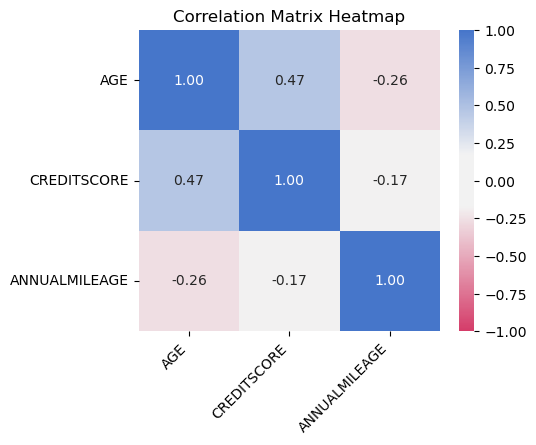

In [6]:
# Compute the correlation matrix for the numerical features
corr_matrix = df_raw[numerical_features].corr()

# Set the size of the heatmap
plt.figure(figsize=(5.5, 4.5))

# Generate a heatmap with annotation
sns.heatmap(corr_matrix, annot=True, square=True, fmt=".2f", vmin=-1, vmax=1, 
            center=0, cmap=sns.diverging_palette(0, 255, sep=45, n=256))

# Configure tick labels and set the title for the correlation matrix heatmap
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The correlation matrix reveals that `AGE` and `CREDITSCORE` are moderately positively correlated, suggesting that as age increases, credit score tends to increase as well. Conversely, there are weak negative correlations between `AGE` and `ANNUALMILEAGE`, and `CREDITSCORE` and `ANNUALMILEAGE`, indicating that higher values in age and credit score are slightly associated with lower annual mileage. Additionally, there is a considerable correlation between `AGE` and `DRIVINGEXPERIENCE`, which could be quantified by transforming the categorical feature `DRIVINGEXPERIENCE` to an ordinal numerical variable.

After examining the numerical features, we turn our attention to the categorical variables, `DRIVINGEXPERIENCE`, `VEHICLEOWNERSHIP`, and `VEHICLEMANUFACTURE`, and visualize their distributions using bar charts.

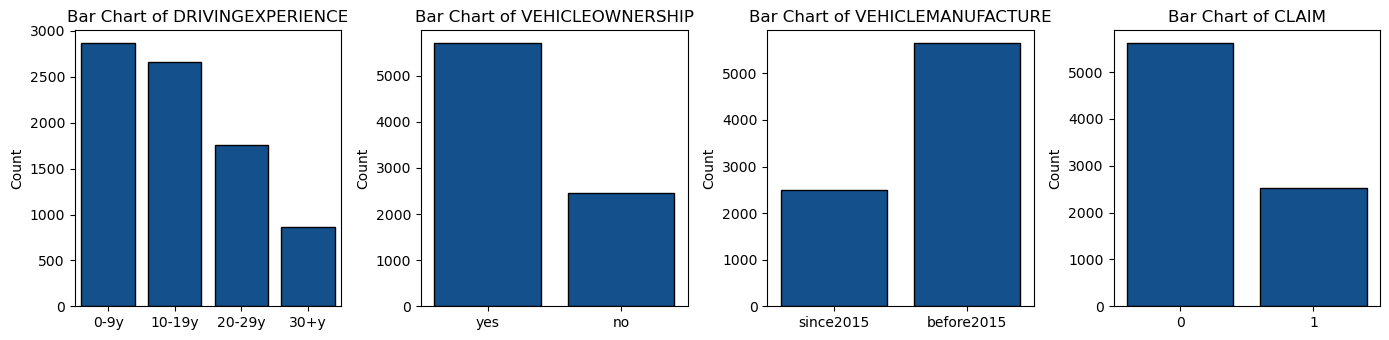

In [7]:
# List of categorical columns in the dataset including the target
categorical_features = ['DRIVINGEXPERIENCE', 'VEHICLEOWNERSHIP', 
                        'VEHICLEMANUFACTURE']

# Create a single figure and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 3.5))

# Create bar charts for each categorical column including the target column
for i, col in enumerate(categorical_features + ['CLAIM']):
    # Count plot on the appropriate subplot
    sns.countplot(x=col, data=df_raw, ax=axes[i], color=COLOR_DARK, 
                  edgecolor='black')
    
    # Set title and labels
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The counts for the categorical variables indicate that the number of policyholders decreases as driving experience increases (`DRIVINGEXPERIENCE`). There is a higher number of vehicle owners (`VEHICLEOWNERSHIP`) compared to non-owners. The majority of vehicles were manufactured before 2015 (`VEHICLEMANUFACTURE`) compared to those manufactured in or after 2015. The moderate imbalance in the `CLAIM` variable was already observed above.

We will now create stacked bar plots for our categorical features to compare how their values vary with the target variable's outcome.

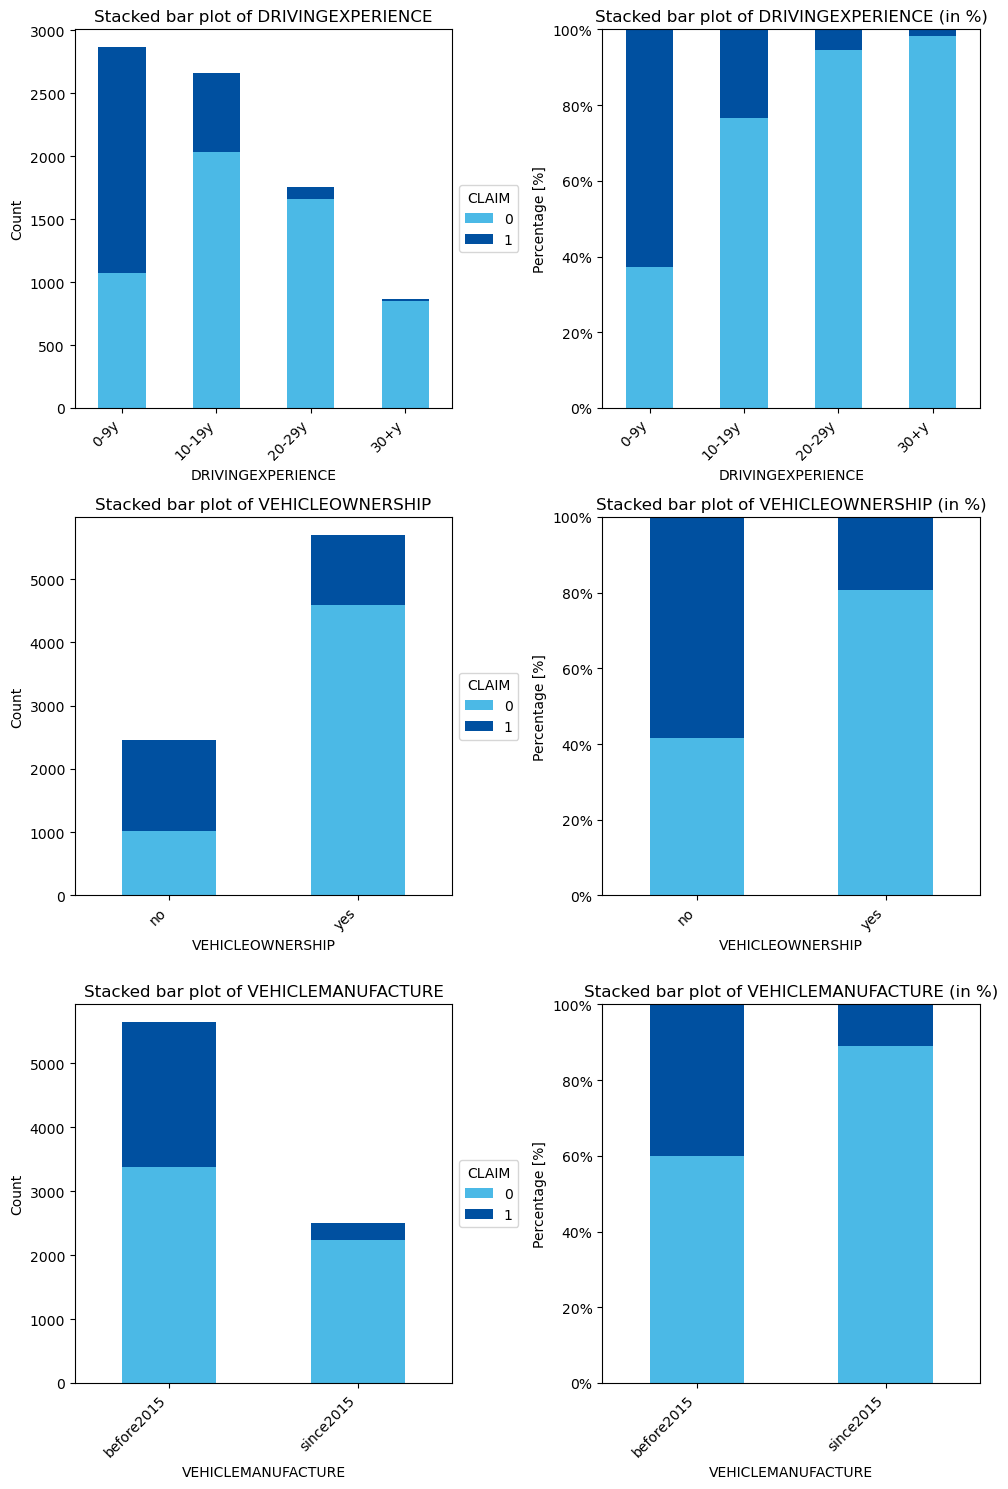

In [8]:
# Number of rows/columns for the subplot grid
n_cols = 2 
n_rows = len(categorical_features)

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Loop through the list of categorical features
for idx, feature in enumerate(categorical_features):
    # Create a crosstab for stacked bar plot structure
    ctab = pd.crosstab(df_raw[feature], df_raw['CLAIM'])
    
    # (1st column) add a new subplot iteratively for count values
    ax1 = plt.subplot(n_rows, n_cols, idx * n_cols + 1) 
    
    # Create a stacked bar plot for count values
    ctab.plot(kind="bar", stacked=True, color=[COLOR_LIGHT, COLOR_DARK], 
              edgecolor="none", ax=ax1)
    
    # Additional plot settings for count subplot
    ax1.set_title(f'Stacked bar plot of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')
    ax1.legend(title='CLAIM', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45, ha='right')
    
    # (2nd column) add a new subplot iteratively for percentage values
    ax2 = plt.subplot(n_rows, n_cols, idx * n_cols + 2)
    
    # Normalize the crosstab by row and multiply by 100 to convert to percentages
    ctab_normalized = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # Create a stacked bar plot for percentage values
    ctab_normalized.plot(kind="bar", stacked=True, 
                         color=[COLOR_LIGHT, COLOR_DARK], edgecolor="none", 
                         ax=ax2)
    
    # Additional plot settings for percentage subplot
    ax2.set_title(f'Stacked bar plot of {feature} (in %)')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Percentage [%]')
    ax2.legend().remove()
    plt.xticks(rotation=45, ha='right')
    
    # Make yticks be in percentages for the percentage subplot
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: 
                                                    "{:.0f}%".format(int(x))))
    ax2.set_ylim(0, 100)
    
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The stacked bar plots reveal a clear trend where less `DRIVINGEXPERIENCE` correlates with a higher incidence of claims, signifying the potential risk associated with inexperienced drivers. The plots also show that policyholders who do not own their vehicles (`VEHICLEOWNERSHIP`) report more claims compared to vehicle owners. Additionally, older vehicles (`VEHICLEMANUFACTURE`) tend to be involved in more claims.

<h1 id="developing-and-evaluating-black-box-model" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">3. Developing and Evaluating a Black Box Machine Learning Model</h1>

Building on our analysis from [Section 2](#brief-exploratory-data-analysis), we now proceed to develop a machine learning model to forecast whether an individual will file a claim. We choose to implement a CatBoost model, which has been widely recognized for its ability to handle categorical data natively and deliver strong predictive performance with minimal data preprocessing. This is well-documented in [[2]](#references_2), as well as evidenced by its frequent use in winning solutions in Kaggle competitions. However, since CatBoost is considered a black box model, it necessitates the use of XAI methods to decode its decisions, offering clarity into the mechanics that drive its predictions.

Before applying the CatBoost algorithm, we divide our dataset into two components: the set of predictor variables `X_raw` and the target variable `y`, consistent with conventional practices in supervised learning. Additionally, we further split the dataset into training and test sets to evaluate the model's performance on unseen data.

In [9]:
# Define the target variable
target = 'CLAIM'

# Set data type for categorical features to category for efficient processing
for cat_feature in categorical_features:
    df_raw[cat_feature] = df_raw[cat_feature].astype('category')

# Separate the dataset into explanatory features and the target variable
X_raw = df_raw.drop(target, axis=1)
y = df_raw[target]
features_X_raw = X_raw.columns

# Display data types of features for verification
print("Data types of features in X_raw:")
print(X_raw.dtypes)

# Split the data into training and testing sets based on predefined TRAIN_RATIO
# and use a consistent RANDOM_SEED for reproducibility
X_raw_train, X_raw_test, y_train, y_test = train_test_split(
    X_raw, y, train_size=TRAIN_RATIO, stratify=y, random_state=RANDOM_SEED
)

# Output the shape of the training and testing sets to confirm the split
print(f"\nTraining set dimensions: {X_raw_train.shape}")
print(f"Test set dimensions:     {X_raw_test.shape}")

Data types of features in X_raw:
AGE                      int64
DRIVINGEXPERIENCE     category
CREDITSCORE            float64
ANNUALMILEAGE          float64
VEHICLEOWNERSHIP      category
VEHICLEMANUFACTURE    category
dtype: object

Training set dimensions: (5704, 6)
Test set dimensions:     (2445, 6)


With data preparations complete, we train the CatBoost model on our training dataset and evaluate its performance on the test data. Our primary evaluation metric is the area under the curve (AUC), which assesses the model’s ability to distinguish between positive and negative classes. Specifically, AUC is calculated from the receiver operating characteristic (ROC) curve, which plots the true positive rate (sensitivity) against the false positive rate across different classification thresholds. An AUC of 0.5 indicates that the model performs no better than random guessing, while an AUC of 1.0 represents perfect classification. Higher AUC values indicate stronger model performance in distinguishing individuals who will file a claim from those who will not. Additionally, we use the accuracy score for further validation. While we do not specifically calculate sensitivity in this notebook, it could provide additional insights into the model’s effectiveness in identifying positive cases.

In [10]:
# Define the CatBoost classifier with specified parameters and random seed
model_CB_raw = CatBoostClassifier(
    iterations=150,
    learning_rate=0.05,
    depth=3,
    random_seed=RANDOM_SEED,
    allow_writing_files=False,
    logging_level='Silent'
)

# Fit the CatBoost model
model_CB_raw.fit(X_raw_train, y_train, cat_features=categorical_features)

# Predict on the test set
predictions_CB_raw = model_CB_raw.predict(X_raw_test)


# Evaluate the model on the test set using AUC and accuracy score
auc_CB_raw = roc_auc_score(y_test, predictions_CB_raw)
acc_CB_raw = accuracy_score(y_test, predictions_CB_raw)

# Print the AUC and accuracy score
print(f"AUC for the CatBoost model on the test data:            "
      f"{auc_CB_raw:.3f}")
print(f"Accuracy score for the CatBoost model on the test data: "
      f"{acc_CB_raw:.3f}")

AUC for the CatBoost model on the test data:            0.809
Accuracy score for the CatBoost model on the test data: 0.831


The CatBoost model demonstrates strong predictive capabilities, evidenced by its high AUC and accuracy values, confirming its effectiveness in making forecasts. This machine learning model will serve as the foundation for the XAI techniques discussed in the upcoming sections.

As we progress through this notebook, it is important to note that certain XAI methods we will explore later require the categorical features to be one-hot encoded for technical reasons (see, e.g., [Subsection 4.1](#global-surrogate-model) or [Subsection 5.2](#local-interpretable-model-agnostic-explanations)). Therefore, we will now apply one-hot encoding to our categorical features. Subsequently, we will partition the encoded dataset into training and test sets, ensuring that the same rows are used for the split as before. This consistency will allow for a fair comparison between models trained on the raw and encoded data.

In [11]:
# One-hot encode categorical features and display the first five rows
X_enc = pd.get_dummies(X_raw)
display(pd.concat([X_enc, y], axis=1).head(5))
features_X_enc = X_enc.columns

# Display data types of features for verification
print("Data types of features in X_enc:")
print(X_enc.dtypes)

# Split the data into training and testing sets based on predefined TRAIN_RATIO
# and use a consistent RANDOM_SEED for reproducibility
X_enc_train, X_enc_test, _, _ = train_test_split(
    X_enc, y, train_size=TRAIN_RATIO, stratify=y, random_state=RANDOM_SEED
)

# Output the shape of the training and testing sets to confirm the split
print(f"\nTraining set dimensions: {X_enc_train.shape}")
print(f"Test set dimensions:     {X_enc_test.shape}")

AGE  CREDITSCORE  ANNUALMILEAGE  DRIVINGEXPERIENCE_0-9y  \
0   73       0.6290        12000.0                       1   
1   16       0.3578        16000.0                       1   
2   18       0.4931        11000.0                       1   
3   21       0.2060        11000.0                       1   
4   29       0.3884        12000.0                       0   

   DRIVINGEXPERIENCE_10-19y  DRIVINGEXPERIENCE_20-29y  DRIVINGEXPERIENCE_30+y  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         1                         0                       0   

   VEHICLEOWNERSHIP_no  VEHICLEOWNERSHIP_yes  VEHICLEMANUFACTURE_before2015  \
0                    0                     1                              0   
1                    1                     0                              1   
2                    0                     1                              1   
3                    0                     1                              1   
4                    0                     1                              1   

   VEHICLEMANUFACTURE_since2015  CLAIM  
0                             1      0  
1                             0      1  
2                             0      0  
3                             0      0  
4                             0      1

Data types of features in X_enc:
AGE                                int64
CREDITSCORE                      float64
ANNUALMILEAGE                    float64
DRIVINGEXPERIENCE_0-9y             uint8
DRIVINGEXPERIENCE_10-19y           uint8
DRIVINGEXPERIENCE_20-29y           uint8
DRIVINGEXPERIENCE_30+y             uint8
VEHICLEOWNERSHIP_no                uint8
VEHICLEOWNERSHIP_yes               uint8
VEHICLEMANUFACTURE_before2015      uint8
VEHICLEMANUFACTURE_since2015       uint8
dtype: object

Training set dimensions: (5704, 11)
Test set dimensions:     (2445, 11)


Equipped with our trained machine learning model, the next section will focus on global model-agnostic explainability methods to elucidate the model's general functionality. In the subsequent section, we will then address local model-agnostic techniques to analyze the decision-making process for individual predictions.

<h1 id="global-explainability-methods" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">4. Global Model-Agnostic Explainability Methods</h1>

In this section, we explore <i>global</i> model-agnostic explainability methods, which provide insights into the overall behavior of the machine learning model developed in the previous section. These techniques are designed to offer a holistic understanding of the model's decisions across the entire data space, allowing to identify general trends and patterns that the model uses to make predictions. In our study, we concentrate on some of the most prominent global model-agnostic methods, namely global surrogate models, partial dependence plots, accumulated local effects, and permutation feature importances. Additional techniques are cited for interested readers in [Section 6](#limitations-and-outlook).

<h1 id="global-surrogate-model"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.1 Global Surrogate Model
    <a class="anchor-link"
       href="#global-surrogate-model"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

The core concept of global surrogate models is straightforward: rather than attempting to interpret a complex black box model (e.g., a gradient boosting model) directly, one substitutes it with a more interpretable white box model (e.g., a decision tree) and extracts insights from this substitute. While the white box model may not match the predictive performance of the black box model, it provides the necessary interpretability to understand and mimic the model's behavior.

<i>Operational Details:</i>

To implement this approach, we undertake the following steps:

1. Train the original (black box) model on the data `X` and labels `y` (or subsets thereof).

2. Generate the model's predictions `y_hat_original` using the data `X`.

3. Select an interpretable surrogate model and train it on `X` and `y_hat_original`.

4. Evaluate how accurately the surrogate model approximates the original model, and if the approximation is satisfactory, interpret the surrogate to gain insights into the workings of the original model.

Steps 1 and 2 are typically straightforward processes. In Step 3, one has to ensure that the surrogate model is indeed easy to interpret (i.e., a white box model). Step 4 is critical: the evaluation measure selected must accurately reflect the fidelity of the surrogate model to the original. The $R^2$ score is commonly used for this purpose, calculated as
$$
R^2 := 1 - \frac{\sum_{{i=1}}^n \left( \hat{y}_i^{{\text{original}}} - \hat{y}_i^{{\text{surrogate}}} \right)^2}{\sum_{{i=1}}^n \left( \hat{y}_i^{{\text{original}}} - \bar{y}^{{\text{original}}} \right)^2}
$$
where
- $\hat{y}_i^{\text{original}}$ is the prediction from the original (black box) model for the $i$-th instance,
- $\hat{y}_i^{\text{surrogate}}$ is the prediction from the surrogate (interpretable) model for the $i$-th instance, and
- $\bar{y}^{\text{original}}$ is the mean over all the predictions from the original (black box) model.

Note that an $R^2$ score of 1 indicates perfect alignment, meaning the surrogate model's predictions are identical to those of the original. Conversely, an $R^2$ score near 0 indicates that the surrogate model provides little to no reliable insight into the original model's behavior.

<i>Application to the Car Insurance Dataset:</i>

To illustrate the XAI method of global surrogate models, we will attempt to replicate the CatBoost model described in [Section 3](#developing-and-evaluating-black-box-model) using both a decision tree and a logistic regression model, which are recognized for their inherent interpretability and status as white box models.

We will begin by employing a flat decision tree as the surrogate model.

In [12]:
# Step 1: Training the CatBoost model has already been completed in Section 3 
# via the following code
# model_CB_raw.fit(X_raw_train, y_train, cat_features=categorical_features)

# Step 2: Generate the predictions from the original (black box) model
pred_model_CB_train = model_CB_raw.predict(X_raw_train)
pred_model_CB_test  = model_CB_raw.predict(X_raw_test)

# Step 3: Train a decision tree (white box) model as the surrogate
# We must use the encoded feature set `X_enc_train` since 
# DecisionTreeClassifier cannot handle raw categorical data
surrogate_model_DT = DecisionTreeClassifier(max_depth=3, 
                                            min_samples_leaf=0.05, 
                                            random_state=RANDOM_SEED)
surrogate_model_DT.fit(X_enc_train, pred_model_CB_train)

# Step 4: Evaluate the surrogate model's performance by comparing its 
# predictions to those of the black box model
pred_surrogate_model_DT = surrogate_model_DT.predict(X_enc_test)
r2_value_DT = r2_score(pred_model_CB_test, pred_surrogate_model_DT)
print(f'R² score (decision tree surrogate): {r2_value_DT:.3f}')

R² score (decision tree surrogate): 0.769



The $R^2$ score of about 0.8 suggests that the decision tree offers a fairly good but not perfect representation of the original CatBoost model. Thus, while some nuances may not be captured, analyzing the decision tree should still convey a meaningful understanding of the primary trends within the more complex model. The most straightforward method to interpret a decision tree involves visual inspection of its internal branching structure.

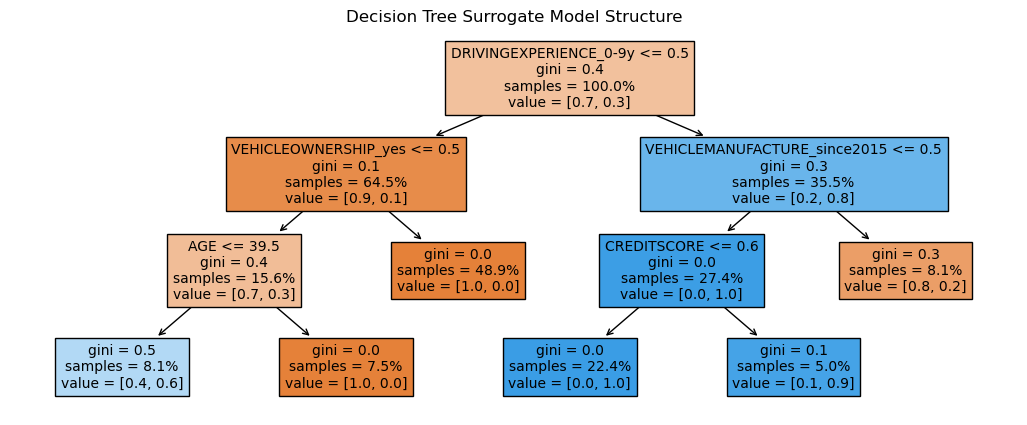

In [13]:
# Plot the fitted decision tree to gain insights into its prediction rules
plt.figure(figsize=(13, 5))
plot_tree(surrogate_model_DT, feature_names=features_X_enc, fontsize=10,
          filled=True, proportion=True, precision=1)
plt.title('Decision Tree Surrogate Model Structure')
plt.show()

The decision tree prioritizes `DRIVINGEXPERIENCE` to stratify policyholders. Less experienced drivers are differentiated by `VEHICLEOWNERSHIP` and `AGE`, with those lacking ownership falling into different claim-filing likelihood groups based on their age, while owners are generally considered less probable to file claims.
For the more experienced drivers, the model looks at the `VEHICLEMANUFACTURE` year, associating owners of newer cars with a lower chance of filing a claim, and deems the age of the driver to be less influential.
In essence, the tree suggests that `DRIVINGEXPERIENCE`, `VEHICLEOWNERSHIP`, and `VEHICLEMANUFACTURE` play critical in forecasting whether a policyholder might file a claim, reflecting a nuanced dynamic between the experience level and vehicle details in the context of claim risk evaluation.

For our second example, we utilize a logistic regression model to serve as an alternate global surrogate model. We will adhere to the same methodology previously demonstrated with the decision tree example.

In [14]:
# Step 1: Training the CatBoost model has already been completed in Section 3
# via the following code
# model_CB_raw.fit(X_raw_train, y_train, cat_features=categorical_features)

# Step 2: Generate the predictions from the original (black box) model has
# already been completed before
# pred_model_CB_train = model_CB_raw.predict(X_raw_train)
# pred_model_CB_test  = model_CB_raw.predict(X_raw_test)

# Step 3: Train a logistic regression (white box) model as the surrogate
# We must use the encoded feature set `X_enc_train` since logistic regression
# cannot handle raw categorical data

# Drop collinear features
X_enc_train_reduced = X_enc_train.drop(
    columns=['DRIVINGEXPERIENCE_0-9y', 'VEHICLEOWNERSHIP_no',
             'VEHICLEMANUFACTURE_before2015']
)
X_enc_test_reduced = X_enc_test.drop(
    columns=['DRIVINGEXPERIENCE_0-9y', 'VEHICLEOWNERSHIP_no',
             'VEHICLEMANUFACTURE_before2015']
)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_enc_train_reduced)
X_test_scaled = scaler.transform(X_enc_test_reduced)

# Convert the scaled data back to DataFrames to keep column names
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_enc_train_reduced.columns,
    index=X_enc_train_reduced.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=X_enc_test_reduced.columns,
    index=X_enc_test_reduced.index
)

# Add the intercept term
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Create and fit the logistic regression model
surrogate_model_LR = sm.Logit(y_train, X_train_scaled).fit()

# Step 4: Evaluate the surrogate model's performance by comparing its
# predictions to those of the black box model
pred_surrogate_model_LR = surrogate_model_LR.predict(X_test_scaled)
r2_value_LR = r2_score(pred_model_CB_test, pred_surrogate_model_LR)
print(f'R² score (logistic regression surrogate): {r2_value_LR:.3f}')

Optimization terminated successfully.
         Current function value: 0.381698
         Iterations 8
R² score (logistic regression surrogate): 0.748


With a notable $R^2$ score of approximately 0.75 for the logistic regression model, it suggests a reasonable correspondence with the original CatBoost model's predictions. While this score implicates a moderate level of agreement, it is still satisfactory for our purposes. We will next examine the logistic regression model's coefficients for further insights.

In [15]:
# Output the summary statistics of the logistic regression model,
# This includes the model coefficients, statistical significance, etc.
print(surrogate_model_LR.summary())

                           Logit Regression Results                           
Dep. Variable:                  CLAIM   No. Observations:                 5704
Model:                          Logit   Df Residuals:                     5695
Method:                           MLE   Df Model:                            8
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                  0.3844
Time:                        12:47:14   Log-Likelihood:                -2177.2
converged:                       True   LL-Null:                       -3536.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.4612      0.053    -27.677      0.000      -1.565      -1.358
AGE                             -0.1020      0.053     -1.938      0.053     

Reviewing the logistic regression output, `AGE` suggests older age slightly reduces claim likelihood, though this effect is borderline significant. `ANNUALMILEAGE` indicates higher mileage increases claim probability. `CREDITSCORE` is not significant, implying negligible impact.
Categories within `DRIVINGEXPERIENCE` have significant negative coefficients, indicating more experience reduces claim likelihood. `VEHICLEOWNERSHIP_yes` and `VEHICLEMANUFACTURE_since2015` both show significant negative impacts, suggesting ownership and newer vehicles decrease claim likelihood.
These observations highlight significant factors like mileage, experience, ownership, and vehicle age. `AGE` shows a borderline effect, while `CREDITSCORE` appears negligible.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of global surrogate models:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Simplicity and Interpretability</u>:<br>
        Global surrogate models, such as logistic regression or decision trees, are inherently simpler and more interpretable than complex machine learning models. They approximate the behavior of the black box model, making it easier to understand the overall trends and patterns that the model captures.</li>
        <li style="margin-bottom: 14px"><u>Insight into Feature Importance</u>:<br>
        Global surrogate models can often offer quantitative measures of feature importance, helping to identify which variables have the most significant impact on the model's predictions.</li>
        <li style="margin-bottom: 14px"><u>Regulatory Compliance</u>:<br>
        Global surrogate models can be particularly beneficial in the insurance industry, where actuaries are often required to provide clear explanations for their predictive models under various regulations. These models can bridge the gap between complex algorithmic decisions and the need for transparent, interpretable explanations that satisfy regulatory mandates.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Approximation Error</u>:<br>
        Global surrogate models are simplifications that aim to mimic the complex model's decisions. The precision of a surrogate model may not always be high, leading to approximation errors where the surrogate's explanations might not fully capture the behavior of the original model.</li>
        <li style="margin-bottom: 14px"><u>Subjectivity in Thresholds for Similarity</u>:<br>
        There is inherent subjectivity in determining the level at which a surrogate model is considered adequately accurate. Metrics like <i>R²</i> lack universal benchmarks for sufficiency, with acceptability varying by application and the need for precision in explanations.</li>
        <li style="margin-bottom: 14px"><u>Loss of Granularity</u>:<br>
        While global surrogate models are good for providing an overall understanding, they might not capture local behaviors or interactions specific to individual predictions. This loss of granularity can be critical for use cases where individual decisions are as important as the overall trend.</li>
        <li style="margin-bottom: 14px"><u>Risk of Misinterpretation</u>:<br>
        Users might incorrectly assume that the explanations provided by the surrogate model fully represent the inner workings of the complex model, which can lead to overconfidence in the simplicity of the explanations and misunderstandings when the model behaves unexpectedly.</li>
        <li style="margin-bottom: 14px"><u>Complexity Trade-off</u>:<br>
        The more interpretable a surrogate model is, typically, the less accurate it becomes. This creates a trade-off between how well the surrogate model represents the complex model and how easily its decisions can be interpreted. Choosing the right balance is a subjective process and can impact the effectiveness of the explanations.</li>
    </ul>
</div>

<h1 id="partial-dependence-plot"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.2 Partial Dependence Plot (PDP)
    <a class="anchor-link"
       href="#partial-dependence-plot"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Partial Dependence Plots (PDPs) are a key visualization technique in XAI that show how one or two features affect a machine learning model's predictions when all other features are held constant. Introduced in [[3]](#references_3), the main goal of a PDP is to reveal the kind of relationship – e.g., linear, monotonic, or more complex – between a feature and the target outcome. They are particularly useful for understanding how a single feature influences predictions across the entire dataset.

<i>Operational Details:</i>

Calculating one-dimensional PDPs for a numerical feature involves several steps. Initially, we choose a range of distinct values to explore for the feature we are interested in. For each value in this range, we take our dataset and create copies where the feature of interest is set to this chosen fixed value for all instances. The model then makes predictions for each of these modified datasets. After computing these predictions, we average them to get a single prediction value for our feature of interest at the fixed value. Repeating this for all the selected values from our range, we obtain a series of average prediction values. Plotting these values against the feature's distinct values, we generate the Partial Dependence Plot, which visualizes the relationship between the feature and the averaged predicted outcomes of the model. For categorical variables, a similar process is used, but the feature is varied across its unique categories rather than a continuous range. Two-dimensional PDPs are calculated by selecting a pair of features, creating a grid of their values, and then averaging model predictions with both features set to each grid point. This process can reveal the interaction between the two features and their combined impact on the predictions when visualized as a surface plot.

<div style="background-color: #f2f2f2; border-left: 4px solid #888888; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
<p style="font-weight: bold"><b>Actuarial Diligence Note</b></p>
<p style="margin-bottom: 10px;">

PDPs can always be calculated, but their interpretation is based on the assumption of feature independence, which may not hold in real-world data where features are often correlated. While the calculation remains possible, the insights from PDPs are most reliable when features are independent, as this aligns with the mathematical foundations of the technique. A more in-depth (technical) discussion on this topic is available in [[4]](#references_4).
In contrast, ALE plots, which will be introduced in the upcoming [Subsection 4.3](#accumulated-local-effects), account for feature correlations, offering a more nuanced view of the data's structure. Although in practice PDPs and ALE plots can produce similar visualizations (for instance, observe the similarities between PDPs and ALE plots within this notebook), ALE plots are generally more reliable when feature dependence is present. It is important to be aware of this shortcoming when using PDP and to validate its findings with additional XAI techniques.

In the case of the car insurance dataset featured in this notebook, the independence of the features is not present, as can be inferred from the correlations shown in [Section 2](#brief-exploratory-data-analysis). Furthermore, we will identify noteworthy differences between the PDP and ALE plot for the variable `AGE` in the Appendix. These differences hint at minor but significant dependencies, such as indicated by the weak correlations between `AGE` and the other variables, suggesting that the PDP does not fully account for the subtle interdependencies between these features. For a more detailed deep dive into these insights, we refer to [Appendix A.2](#deep-dive-pdp-vs-ale).
</p>
</div>

<i>Relation to Other XAI Methods:</i>

PDPs are related to other XAI methods like Individual Conditional Expectation (ICE) (see [Subsection 5.3](#subsection_ice)) and Accumulated Local Effects (ALE) (see [Subsection 4.3](#accumulated-local-effects)). ICE plots are similar to PDPs but display one line per instance, showing the model’s prediction for an individual instance across a range of feature values. In fact, PDPs can be thought of as the average of all the ICE plot lines, smoothing out individual variances to show a more general trend. ICE plots can reveal heterogeneous effects and feature interactions that PDPs might average out. ALE plots, on the other hand, address feature correlations by considering the local dependency structure of the dataset. ALE measures the accumulated local effect of a feature on the prediction and is, therefore, less influenced by correlations between features compared to PDP and ICE.

<i>Interpretation:</i>


Interpreting one-dimensional PDPs is generally straightforward: the $y$-axis represents the average predicted probability of the outcome, and the $x$-axis displays the values of the feature of interest. A flat line would imply that the model's predicted probability is not sensitive to changes in that feature, while a slope signifies a dependency. The steeper the slope, the greater the influence of the feature on the predicted probability. The interpretation for two-dimensional PDPs is similar, where the interaction between two features and their joint impact on the predicted probabilities are visualized.

<i>Application to the Car Insurance Dataset:</i>

We begin the demonstration of Partial Dependence Plots by constructing one-dimensional PDPs for the numerical features within our car insurance dataset.

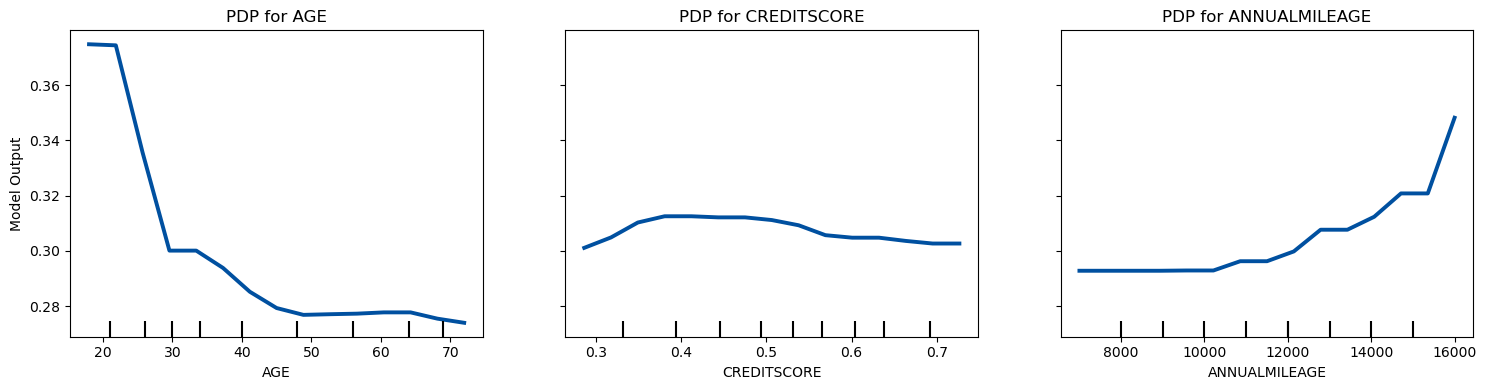

In [16]:
# Determine the positions (indices) of the numerical features in X_raw_test
numerical_feature_positions = [X_raw_test.columns.get_loc(feature) 
                               for feature in numerical_features]

# Create the Partial Dependence Plot (PDP)
display = PartialDependenceDisplay.from_estimator(
    model_CB_raw, X_raw_test, features=numerical_feature_positions,
    kind='average', n_cols=3, grid_resolution=15,
    pd_line_kw={'color': COLOR_DARK, 'linewidth': 2.8, 'linestyle': '-'}
)

# Set the figure size
display.figure_.set_size_inches(15, 4)

# Customize the display
for i, axi in enumerate(display.axes_.ravel()):
    axi.set_title(f'PDP for {numerical_features[i]}')
    axi.set_ylabel("Model Output" if i == 0 else "")  
    axi.set_xlabel(numerical_features[i])

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The PDP for `AGE` indicates notable differences in predicted claim probabilities at certain age groups, illustrating age-specific effects on the model output. For `CREDITSCORE`, the PDP reveals a consistent, almost linear relationship. Lastly, the PDP for `ANNUALMILEAGE` displays a non-linear relationship with the predicted probabilities, suggesting a link between higher mileage and increased probabilities, which may reflect vehicle usage risk. It is important to note that in the calculation of PDPs, unfeasible instances can be processed, such as a 20-year-old person with a driving experience of more than 30 years.

Next, we generate two-dimensional PDPs for the numerical variables to reveal potential interactions between feature pairs affecting the model's predictions.

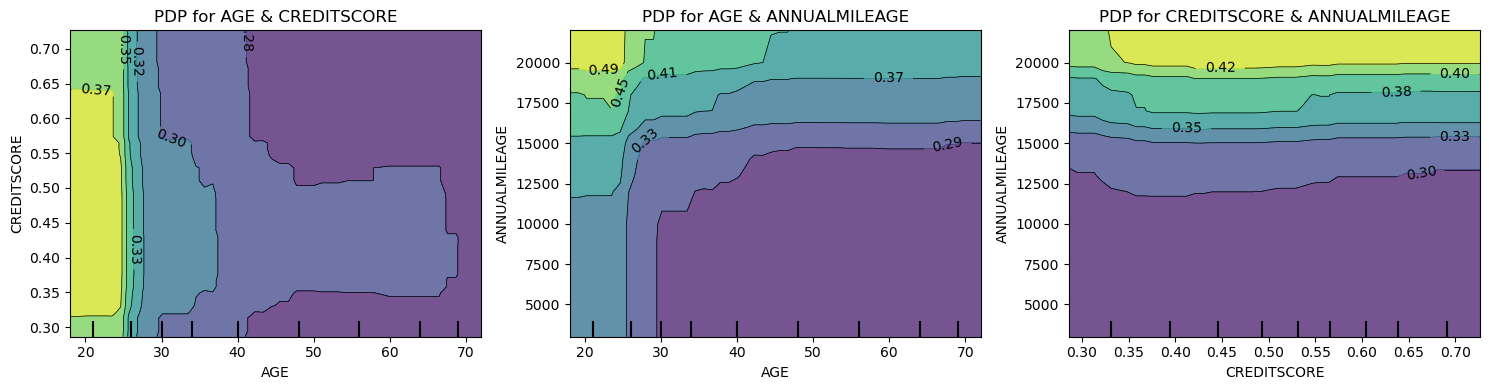

In [17]:
# Define the list of pairs of features for two-dimensional PDPs
features_pairs = [('AGE', 'CREDITSCORE'), 
                  ('AGE', 'ANNUALMILEAGE'), 
                  ('CREDITSCORE', 'ANNUALMILEAGE')]

# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 3 plots side by side

# Compute and plot the two-dimensional PDPs on the respective subplots
for i, feature_pair in enumerate(features_pairs):
    display = PartialDependenceDisplay.from_estimator(
        model_CB_raw, X_raw_test, features=[feature_pair],
        kind='average', n_cols=1, grid_resolution=50, ax=axs[i]
    )
    display.axes_[0, 0].set_title(f'PDP for {feature_pair[0]} & {feature_pair[1]}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The two-dimensional Partial Dependence Plots indicate no significant interdependencies between `AGE`, `CREDITSCORE`, and `ANNUALMILEAGE`. The absence of pronounced interaction effects suggests that these features affect the model's predictions without noticeable interaction. However, in regions where data is scarce, the plots may display anomalies due to limited information.

Having constructed both one-dimensional and two-dimensional Partial Dependence Plots for our numerical features, we now shift our attention to the categorical variables. To gain a similar depth of insight, we will proceed to generate one-dimensional and two-dimensional PDPs for these categorical attributes as well.

We will start with the one-dimensional PDPs for the categorical features.

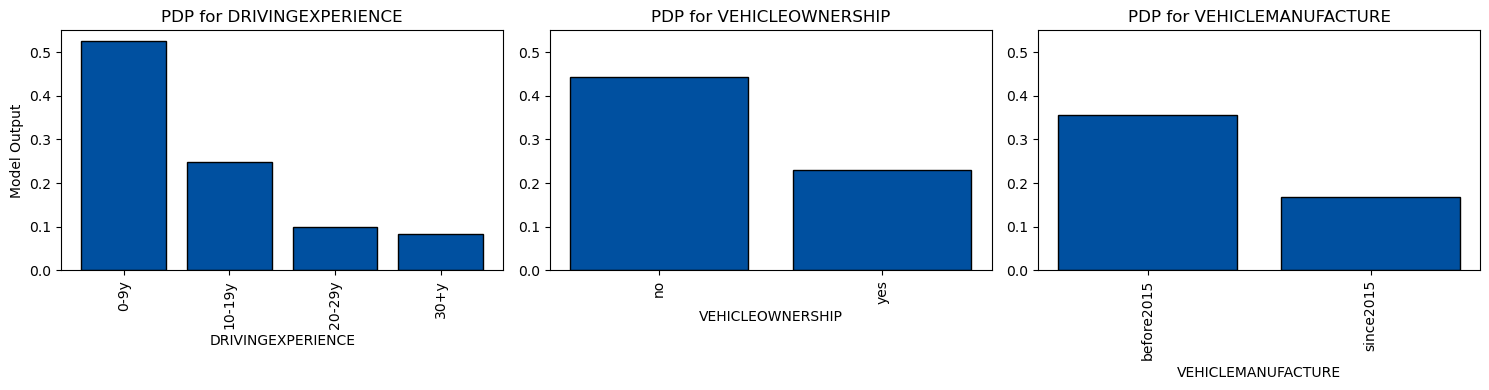

In [18]:
# Determine the positions (indices) of the categorical features in X_raw_test
categorical_feature_positions = [X_raw_test.columns.get_loc(feature)
                                 for feature in categorical_features]

# Set up the figure for multiple subplots
fig, axs = plt.subplots(ncols=len(categorical_features), figsize=(15, 4))

# Plot partial dependence for each categorical feature
for i, (feature, ax) in enumerate(zip(categorical_features, axs.flatten())):
    display = PartialDependenceDisplay.from_estimator(
        model_CB_raw, X_raw_test, kind='average',
        features=[categorical_feature_positions[i]],         
        categorical_features=[categorical_feature_positions[i]], 
        feature_names=X_raw_test.columns, ax=ax
    )
    # Adjust colors
    for container in display.axes_[0][0].containers:
        for bar in container:
            bar.set_color(COLOR_DARK)
            bar.set_edgecolor('black')
    # Customize the display
    for j, axi in enumerate(display.axes_.ravel()):
        axi.set_title(f'PDP for {feature}')
        axi.set_ylim([0.0, 0.55])
        axi.set_ylabel("Model Output" if i == 0 else "")  
        axi.set_xlabel(feature)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The Partial Dependence Plots illustrate the model's prediction tendencies: policyholders with less driving experience are seen as more likely to file a claim, as captured in the `DRIVINGEXPERIENCE` feature. Not owning a vehicle, represented by the `VEHICLEOWNERSHIP` variable, also correlates with a higher probability of claim submission. Lastly, the `VEHICLEMANUFACTURE` feature suggests that older vehicles are more prone to claims than their newer counterparts, indicating a potential risk factor for insurers.

Next, we will implement the two-dimensional PDPs for the categorical features.

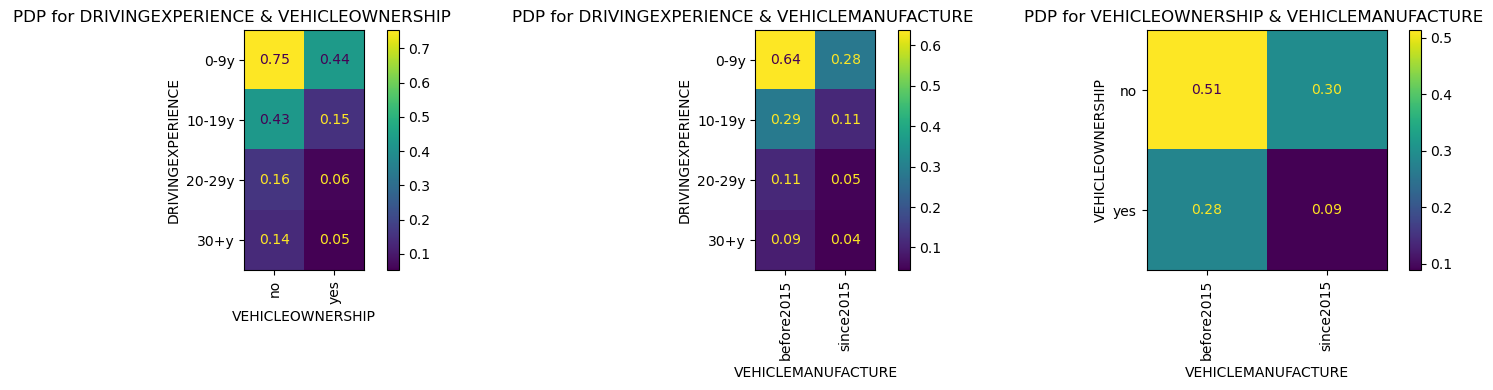

In [19]:
# Define pairs of features for which to plot 2D PDPs
feature_pairs = [('DRIVINGEXPERIENCE', 'VEHICLEOWNERSHIP'),
                 ('DRIVINGEXPERIENCE', 'VEHICLEMANUFACTURE'),
                 ('VEHICLEOWNERSHIP', 'VEHICLEMANUFACTURE')]

# Determine the column indices for categorical features
category_indices = {
    'DRIVINGEXPERIENCE':  X_raw_train.columns.get_loc('DRIVINGEXPERIENCE'), 
    'VEHICLEOWNERSHIP':   X_raw_train.columns.get_loc('VEHICLEOWNERSHIP'), 
    'VEHICLEMANUFACTURE': X_raw_train.columns.get_loc('VEHICLEMANUFACTURE')
}

# Set up the figure for multiple subplots
fig, axs = plt.subplots(ncols=len(feature_pairs), figsize=(15, 4))

# Plot partial dependence for each feature pair
for i, feature_pair in enumerate(feature_pairs):
    feature_indices = [category_indices[feat] for feat in feature_pair]
    display = PartialDependenceDisplay.from_estimator(
        model_CB_raw, X_raw_train, features=[feature_indices], 
        categorical_features=feature_indices, kind='average', ax=axs[i],
        feature_names=X_raw_train.columns                   
    )
    #display.axes_[0][0].set_aspect(0.5)
    # Set the title for each subplot 
    axs[i].set_title(f'PDP for {feature_pair[0]} & {feature_pair[1]}')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The two-dimensional Partial Dependence Plots show clear interactions between features affecting claim probabilities: `DRIVINGEXPERIENCE` coupled with `VEHICLEOWNERSHIP` shows that inexperience and lack of ownership amplify the likelihood of filing a claim. Similarly, an interaction between `DRIVINGEXPERIENCE` and `VEHICLEMANUFACTURE` indicates that inexperienced drivers with older vehicles face a higher risk of claims. These interactions suggest that the combination of these categorical factors has a more significant impact on the model's predictions than the individual features alone.

Note that while it is possible to generate a two-dimensional PDP combining one numerical and one categorical feature, we have chosen to exclude this for the sake of brevity.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of Partial Dependence Plots:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Intuitive Visualization</u>:<br>
        Partial Dependence Plots offer a clear and accessible way to depict the relationship between a feature and the predicted outcomes, facilitating easy interpretation of complex model behaviors.</li>
        <li style="margin-bottom: 14px"><u>Non-Technical Stakeholder Engagement</u>:<br>
        PDPs provide visual explanations that can be readily presented to stakeholders without a data science background, aiding in transparent decision-making processes.</li>
        <li style="margin-bottom: 14px"><u>Feature Interaction Insights</u>:<br>
        Two-dimensional PDPs can reveal the interaction effects between pairs of features on the predicted outcome, offering a deeper understanding of how feature combinations influence model predictions.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Dependence on Feature Independence for Interpretation</u>:<br>
        While PDPs can always be calculated, their interpretation relies on the assumption of feature independence. Since features are often correlated in real-world data, this can lead to misleading insights, though PDPs are reliable when features are independent. </li>
        <li style="margin-bottom: 14px"><u>Creation of Unfeasible Instances</u>:<br>
        By design, PDPs can suggest interpretations based on combinations of feature values that do not occur naturally, leading to conclusions about non-existent or unfeasible instances.</li>
        <li style="margin-bottom: 14px"><u>Limited by Dimensionality</u>:<br>
        Designed for one or two features at a time, PDPs struggle in high-dimensional space where feature interactions are complex.</li>
        <li style="margin-bottom: 14px"><u>Oversimplified Representation</u>:<br>
        By averaging out the effects of all other features, PDPs can oversimplify the model behavior and may not accurately reflect the local nuances that could be captured by Individual Conditional Expectation (ICE) plots.</li>
    </ul>
</div>

<h1 id="accumulated-local-effects"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.3 Accumulated Local Effects (ALE)
    <a class="anchor-link"
       href="#accumulated-local-effects"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Accumulated Local Effects (ALE) plots, introduced in [[5]](#references_5), are used to understand how individual features influence model predictions by focusing on their local effects rather than global ones. This means that ALE plots capture subtle variations that other methods might miss. Unlike Partial Dependence Plots (PDPs, see [Subsection 4.2](#partial-dependence-plot)), which show the average effect of a feature over the entire dataset, ALE plots examine the impact of small changes in feature values within local regions of the data. This approach addresses PDP's limitations by providing a more accurate reflection of a feature's effect in the presence of interactions with other features.

<i>Operational Details:</i>

For numerical features, ALE is calculated by partitioning the range of a feature into intervals and accumulating the differences in predictions that result from perturbing the feature within these intervals. This is done by evaluating the model with feature values slightly above and below the observed value and taking the average of these prediction changes. The local effect is then the accumulated average across these intervals for a feature.
In the case of categorical features, ALE determines the predictive effects by comparing how the model's outputs vary when the feature value changes between categories. It then integrates these variations to capture the overall influence of category changes throughout the dataset.

<i>Relation to Other XAI Methods:</i>

ALE plots provide a valuable connection between PDPs (see [Subsection 4.2](#partial-dependence-plot)) and Individual Conditional Expectation (ICE) plots (see [Subsection 5.3](#individual-conditional-expectation)). Contrasting with PDPs that examine average effects and ICE plots that detail paths for individual instances, ALE strikes a balance by aggregating localized changes – circumventing assumptions of feature independence and thus furnishing a more faithful representation of a feature's influence.

<i>Interpretation:</i>

Interpreting ALE plots involves examining the shape and slope of the curve. A flatter curve suggests that the feature has a minimal effect on the model's predictions within that range, while a curve with a steep slope or significant fluctuations indicates that the feature has a substantial effect that may vary across different values.

<i>Application to the Car Insurance Dataset:</i>

First, we examine the one-dimensional ALE plots corresponding to the numerical features in our dataset.

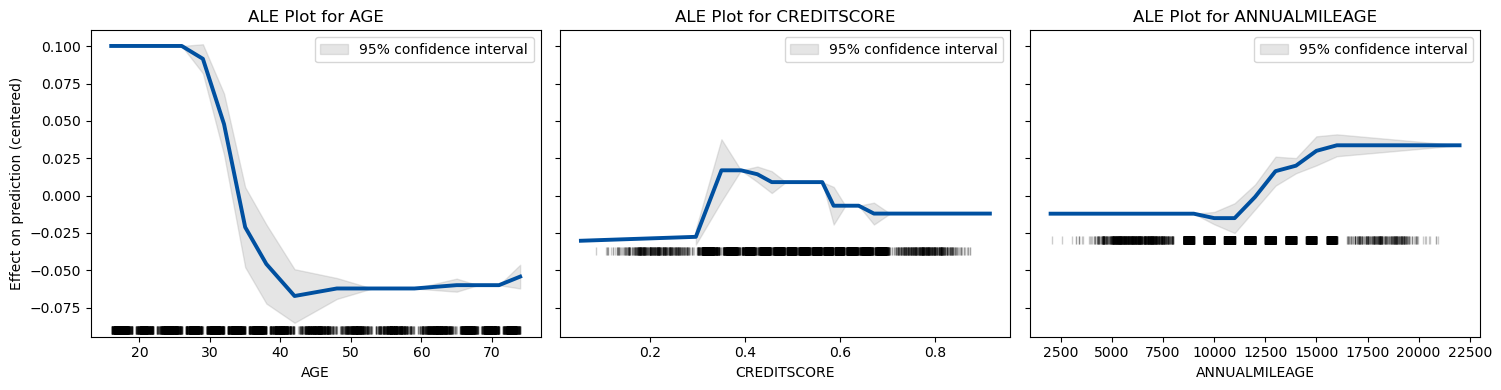

In [20]:
# Set up a figure with subplots (one for each feature)
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 4), sharey=True)

# Generate ALE plot for each feature
for i, feature in enumerate(numerical_features):
    ale_plot = ale(
        X=X_raw_train,       # DataFrame containing the training feature data
        model=model_CB_raw,  # Trained model
        feature=[feature],   # Feature to analyze (as a list)
        feature_type='continuous',
        grid_size=15,        # Grid size, can be set according to needs
        include_CI=True,    
        fig=fig,
        ax=axes[i]          # Use the i-th axis for the plot
    )
    
    # Adjust line style and color
    axes[i].lines[0].set_color(COLOR_DARK)
    axes[i].lines[0].set_linewidth(2.8)
    
    # Set title for each subplot
    axes[i].set_title(f"ALE Plot for {feature}")
    
    # Clean up x and y labels if necessary
    if i > 0:
        axes[i].set_ylabel('')        
    axes[i].set_xlabel(feature)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

The one-dimensional ALE plots for `AGE`, `CREDITSCORE`, and `ANNUALMILEAGE`, adjusted to a centered baseline to enhance clarity, unveil nuances beyond what PDPs illustrate. For `CREDITSCORE`, there is a noticeable non-linear relationship with claim predictions, in distinct contrast to the nearly linear representation in its PDP. `AGE` presents a curve similar to what's observed in its PDP, yet `ANNUALMILEAGE` reveals a markedly different pattern, highlighting the unique insights ALE plots can provide.

Lastly, we visualize the interactions between selected feature pairs using two-dimensional ALE plots.

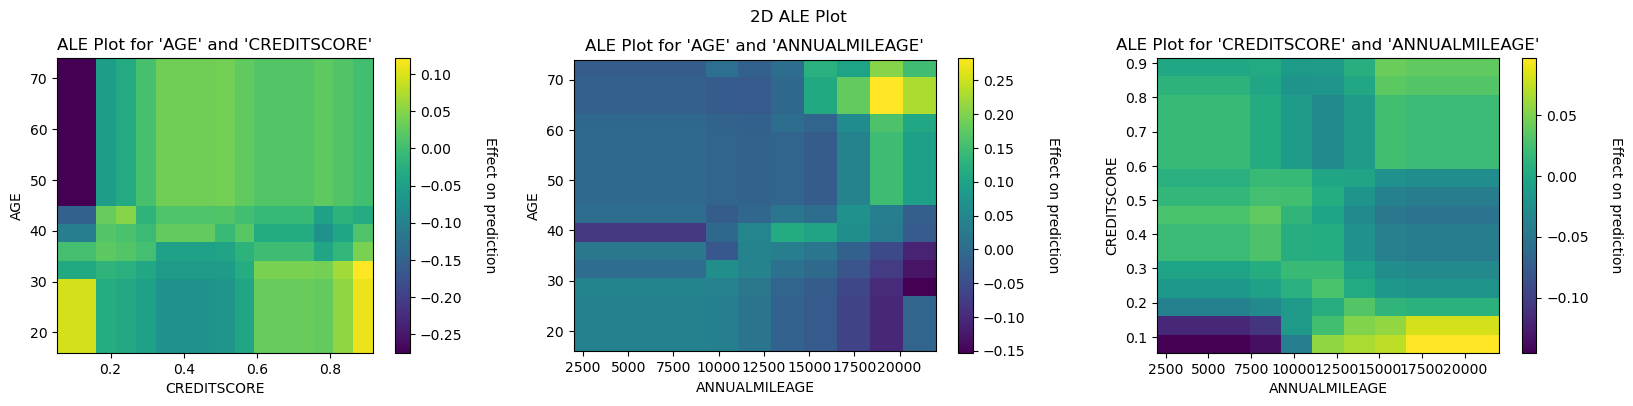

In [21]:
# Define feature pairs to plot
feature_pairs = [('AGE', 'CREDITSCORE'), 
                 ('AGE', 'ANNUALMILEAGE'), 
                 ('CREDITSCORE', 'ANNUALMILEAGE')]

# Set up a figure with three subplots (3 rows, 1 column)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 4))

# Iterate over feature pairs and axes to create ALE plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    # Use the ale function, providing the corresponding ax
    ale_plot = ale(
        X=X_raw_train,                # DataFrame containing the training data
        model=model_CB_raw,           # Trained model
        feature=[feature1, feature2], # Feature pair to analyze
        grid_size=15,                 # Grid size can be set according to needs
        include_CI=False,
        fig=fig,
        ax=axes[i]                    # Use the i-th axis for the plot
    )
    # Adjust aspect ratio since the range of variables is different
    if i == 0:
        axes[i].set_aspect(1 / 72)
    elif i == 1:
        axes[i].set_aspect(20000 / 72)
    elif i == 2:
        axes[i].set_aspect(20000)
    # Set the title for each subplot
    axes[i].set_title(f"ALE Plot for '{feature1}' and '{feature2}'")

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

The ALE plots suggest that the features `AGE`, `ANNUALMILEAGE`, and `CREDITSCORE` influence the model's predictions without any significant interactions between them. Additionally, none of these three features has a substantial impact on the model's output, and extreme values occurring in data-sparse regions do not markedly affect the overall interpretation of the model's behavior.

Please note that for brevity, we have omitted the inclusion of both one-dimensional and two-dimensional ALE plots for categorical features, as well as combined two-dimensional ALE plots that involve one numerical and one categorical feature.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of Accumulated Local Effects:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Handles Feature Dependency</u>:<br>
        Unlike Partial Dependence Plots (PDPs), ALE plots take into account the potential interactions among features by focusing on local effects of features, thus providing more accurate representations when features are correlated.</li>
        <li style="margin-bottom: 14px"><u>Reduced Computational Cost</u>:<br>
        ALE plots require fewer computations than PDPs when dealing with high-cardinality categorical features or continuous features, because they do not have to average predictions across all possible values of other features.</li>
        <li style="margin-bottom: 14px"><u>Localized Interpretations</u>:<br>
        ALE plots provide insights into the effects of features on predictions in different regions of the feature space, which can be more informative about the actual operation of the model in specific localized areas, compared to the more global perspective of PDPs.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>More Complex Calculation</u>:<br>
        The calculation and explanation of ALE plots are more complex than those of PDPs, making them particularly challenging to present to non-technical stakeholders.
        </li>
        <li style="margin-bottom: 14px"><u>Potentially Misleading with Sparse Data</u>:<br>
        In regions of the feature space where data is sparse, ALE estimates might be unreliable due to the lack of sufficient data to calculate accurate local accumulated effects.</li>
        <li style="margin-bottom: 14px"><u>Dimensionality Constraints</u>:<br>
        Similar to PDPs, ALE plots are primarily useful for visualizing one or two features at a time, and they may not effectively communicate the presence of complex multidimensional interactions.</li>
        <li style="margin-bottom: 14px"><u>Lack of Individual Variation Insights</u>:<br>
        Unlike PDPs, ALE plots are not accompanied by ICE curves and therefore it is hard to dectect heterogeneity in the feature effect.</li>
    </ul>
</div>

<h1 id="permutation-feature-importance"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    4.4 Permutation Feature Importance (PFI)
    <a class="anchor-link"
       href="#permutation-feature-importance"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Feature importances play a crucial role in understanding the decision-making process of machine learning models by identifying how much each feature contributes to the model's predictions. This information is valuable not only for interpreting the model but also for feature engineering and feature selection for future model iterations. Permutation Feature Importance (PFI) is a model-agnostic technique used to measure the importance of a feature by calculating the decrease in the model's performance when that feature's values are shuffled, thereby breaking the relationship between the feature and the outcome. Initially, PFI was used in the context of random forests, see [[6]](#references_6).

<i>Operational Details:</i>

PFI is calculated using the following method for both numerical and categorical variables. The process involves the following steps, repeated for each feature separately:

1. The model is initially evaluated on a dataset to establish a baseline performance score, using a metric such as AUC or accuracy score.

2. For the feature under consideration, the values are permuted in the dataset – randomly shuffled to disrupt the correlation between that feature and the target – and the model is re-evaluated on this perturbed dataset. The performance decrease, as compared to the baseline, is recorded as the importance score for the feature.

3. The permutation and evaluation process is typically repeated multiple times to obtain a reliable estimate of feature importance, and the average drop in performance is calculated.

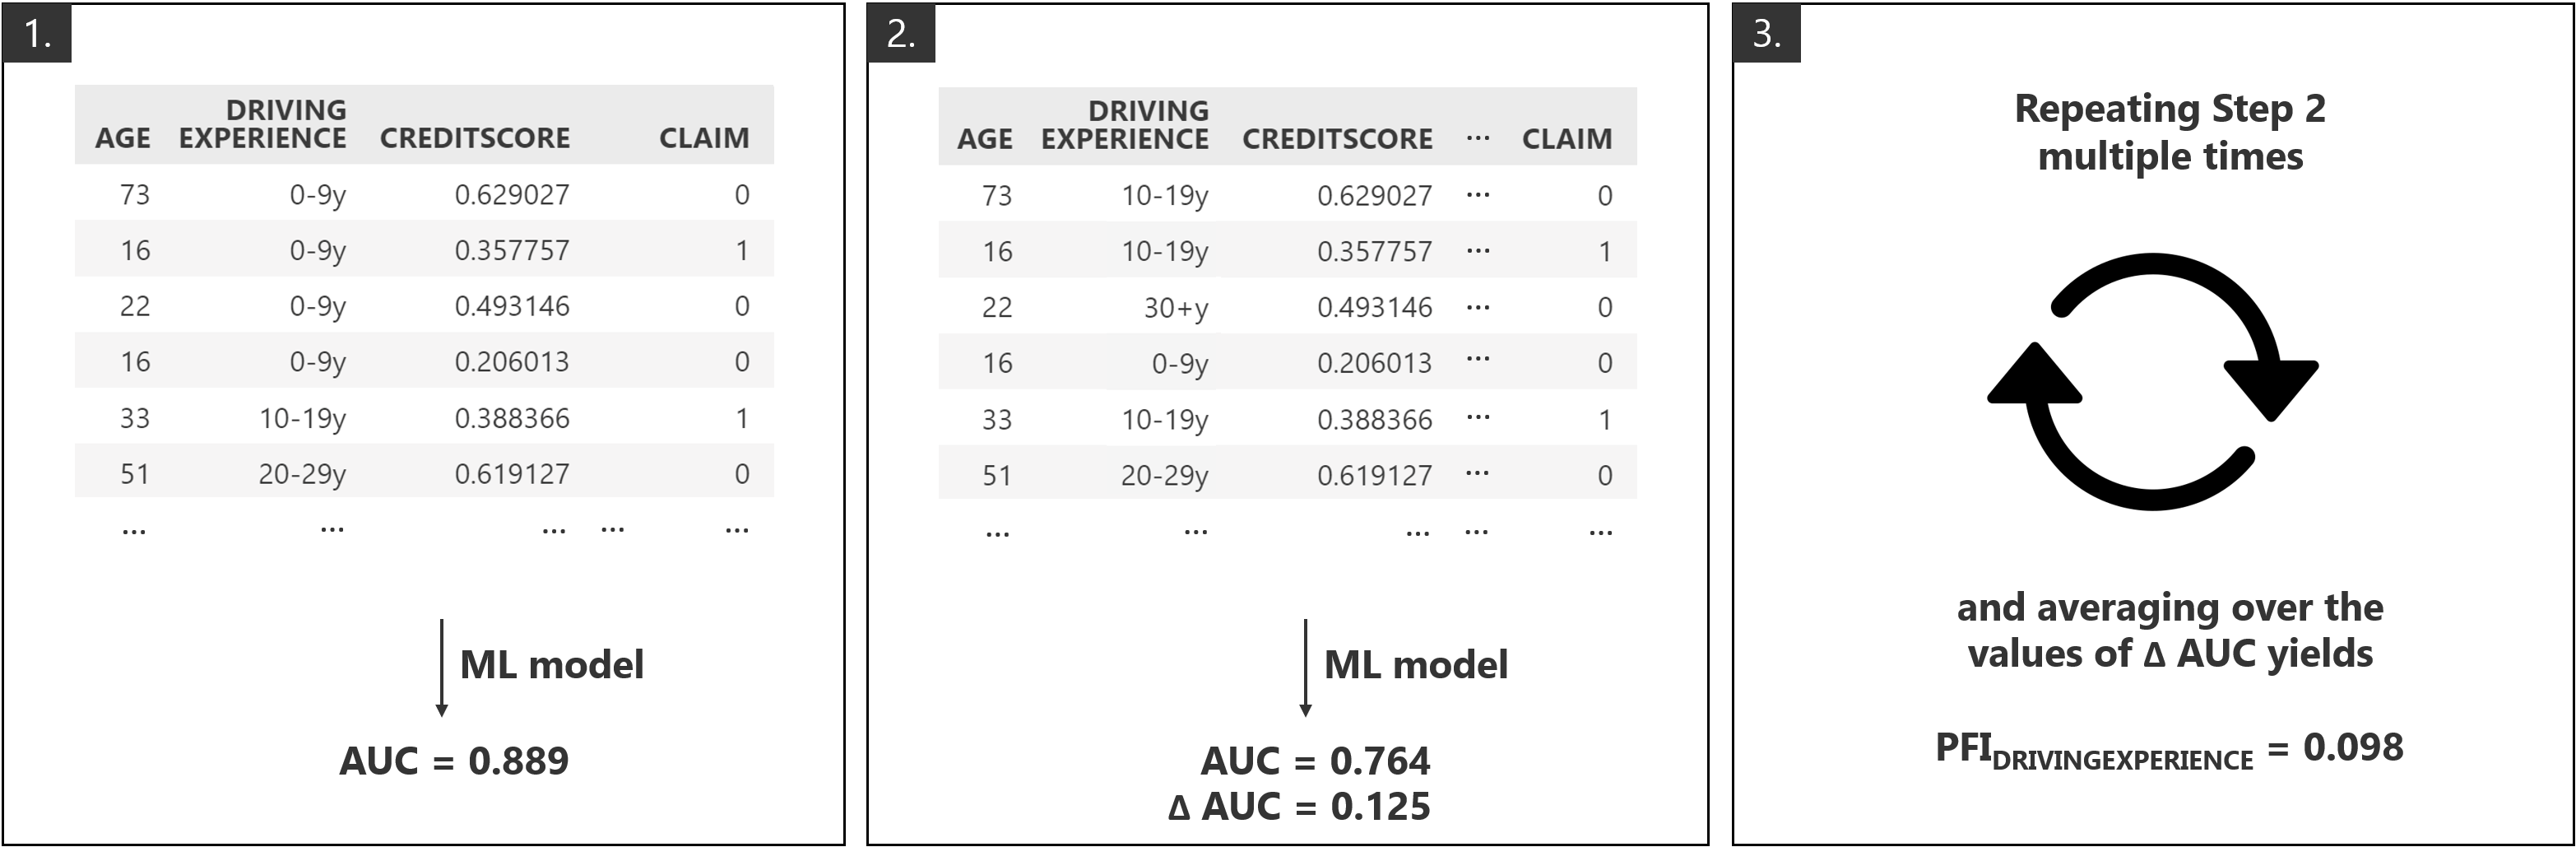

<i>Interpretation:</i>

The heuristic interpretation of PFI results is as follows: a notable decrease in the model's performance indicates that the feature is significant for the model's predictive accuracy. Conversely, a minor or insubstantial decrease points to a feature being non-essential. An advantage of PFI is its simplicity and applicability to any model, regardless of its complexity. However, it is essential to note that PFI can be sensitive to data leakage or features that are artificially over-represented. It can also fail to detect interactions between features since it evaluates them in isolation.

<div style="background-color: #f2f2f2; border-left: 4px solid #888888; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
<p style="font-weight: bold"><b>Actuarial Diligence Note</b></p>
<p style="margin-bottom: 10px;">

When implementing permutation feature importance (PFI), one has to be aware of its fundamental assumption that shuffling a feature's values does not impact the distribution of other features. This assumption can be problematic in real-world datasets where features are often correlated, potentially leading to misleading interpretations. To ensure robustness in the conclusions drawn from PFI, it is advisable to compare its outcomes with other feature importance measures. This could include models' internal feature importances (if existent), like those within CatBoost, feature importances derived from SHAP (see [Subsection 5.1](#shapley-additive-explanations)), or other relevant methods. These additional methods, which typically take into account the model's structure, can provide alternative  importance rankings and thus a more comprehensive understanding of feature significance. For a detailed comparison using the car insurance dataset, refer to [Appendix A.3](#deep-dive-feature-importance-methods).
</p>
</div>

<i>Application to the Car Insurance Dataset:</i>

The code snippet below demonstrates the application of PFI on our car insurance dataset.

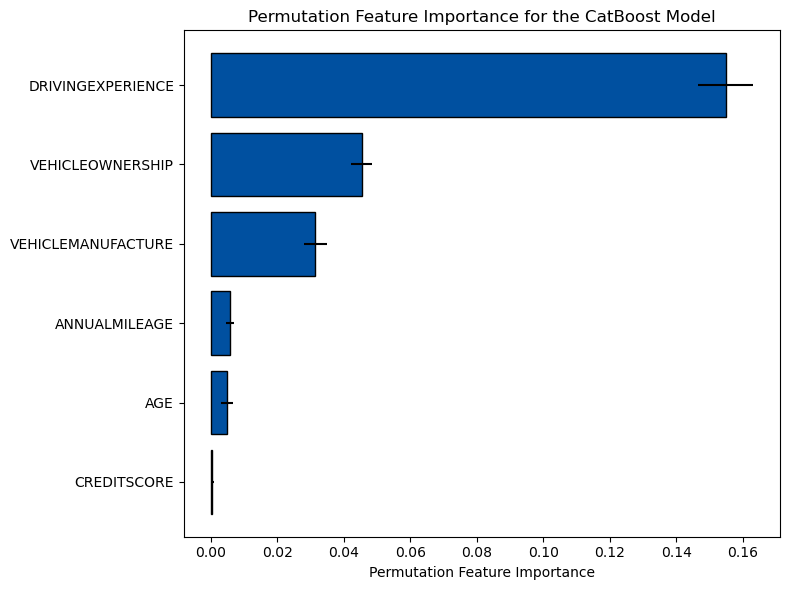

In [22]:
# Perform permutation importance
results = permutation_importance(
    model_CB_raw, X_raw_test, y_test, 
    scoring='roc_auc',             # Metric for scoring permutations
    n_repeats=1000,                # Number of times to permute a feature
    random_state=RANDOM_SEED       # The random seed for reproducibility
)

# Sort feature importances in descending order and get their indices
sorted_idx = results.importances_mean.argsort()

# Get the standard deviations for the sorted features
sorted_std = results.importances_std[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(
    range(len(sorted_idx)),
    results.importances_mean[sorted_idx],
    color=COLOR_DARK,
    edgecolor='black',
    xerr=sorted_std,  # Include empirical standard errors
)
plt.yticks(range(len(sorted_idx)), 
           [X_raw_test.columns[i] for i in sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.title("Permutation Feature Importance for the CatBoost Model")
plt.tight_layout()
plt.show()

In our car insurance dataset analysis using the CatBoost model, `DRIVINGEXPERIENCE` emerges as the most influential factor affecting predictions, surpassing variables related to the vehicle. In contrast, `CREDITSCORE` exerts a lesser impact. Nevertheless, the correlation observed between `DRIVINGEXPERIENCE` and `AGE` calls for a prudent interpretation due to the potential skewing of perceived importance caused by their relationship. These findings align with observations from the decision tree surrogate model, where `DRIVINGEXPERIENCE`, `VEHICLEOWNERSHIP`, and `VEHICLEMANUFACTURE` were pivotal in the classification decision-making process. In the calculation of PFI, it is possible that – similar to PDP before – unfeasible data is processed, like a 20-year-old person with more than 30 years of driving experience.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of Permutation Feature Importance:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Intuitive Interpretation</u>:<br>
        The method is straightforward to understand – features that impact the model performance more significantly when permuted are considered more important.</li>
        <li style="margin-bottom: 14px"><u>Useful for Feature Selection</u>:<br>
        Permutation feature importance can be used as a tool for feature selection by identifying the features that do not contribute significantly to the model's predictive power.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Impact of Correlated Features</u>:<br>
        When features are correlated, permuting one feature can also indirectly affect the importance of another, which can lead to misinterpreting feature importance.</li>
        <li style="margin-bottom: 14px"><u>Generation of Unrealistic Data</u>:<br>
        The shuffling of values to assess importance can result in the generation of improbable or impossible data combinations, which can in turn affect the reliability of the importance measurements.</li>
        <li style="margin-bottom: 14px"><u>Computationally Expensive</u>:<br>
        For models that are slow to predict or datasets that are large, computing PFI can be computationally expensive because it involves re-evaluating the model multiple times.</li>
        <li style="margin-bottom: 14px"><u>Does Not Account for Model Internals</u>:<br>
        Permutation feature importance is purely based on changes in model performance without considering the internal structure or coefficients of the model that might give more insight into how features are used by the model.</li>
        <li style="margin-bottom: 14px"><u>Randomness in Importance Scores</u>:<br>
        The randomness introduced by permuting features can sometimes lead to variability in importance scores across multiple runs, especially when the dataset is small or the model is very complex.</li>
    </ul>
</div>

<h1 id="local-explainability-methods" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px;  padding-left: 14px;">5. Local Model-Agnostic Explainability Methods</h1>

In this section, we examine <i>local</i> model-agnostic explainability methods, where the objective is to understand the decision-making process of machine learning models at an individual prediction level. Such methods can, for instance, provide insights into how each feature affects a single prediction, or they may illuminate the localized behavior of the model in the area surrounding a specific instance. We focus on the key techniques Shapley Additive Explanations (SHAP), Local Interpretable Model-Agnostic Explanations (LIME), and Individual Conditional Expectation (ICE) plots.

Throughout this section, our goal is to detail the model's decision-making process for the following particular entry within our car insurance dataset:

In [23]:
# Instance of interest
observation_index = 13

# Combine the independent features and the prediction into one DataFrame
observation_features = X_raw_test.iloc[[observation_index]]
observation_prediction = model_CB_raw.predict_proba(
    observation_features)[:, 1].item()
observation_combined = observation_features.assign(
    CLAIM_predicted=observation_prediction
)

# Display the combined information as one line
observation_combined

AGE DRIVINGEXPERIENCE  CREDITSCORE  ANNUALMILEAGE VEHICLEOWNERSHIP  \
1722   41              0-9y        0.484        11000.0               no   

     VEHICLEMANUFACTURE  CLAIM_predicted  
1722         before2015         0.831494

<h1 id="shapley-additive-explanations"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    5.1 Shapley Additive Explanations (SHAP)
    <a class="anchor-link"
       href="#shapley-additive-explanations"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Shapley Additive Explanations (SHAP) is a powerful XAI method based on cooperative game theory that provides a way to explain the output of machine learning models. Introduced in [[7]](#references_7), it assigns each feature an importance value for a particular prediction by simulating a "game" where each feature value of the instance is considered a "player" and the prediction is the "payout". SHAP values are calculated by averaging the marginal contributions of a feature across all possible combinations of features (see below). This framework ensures that SHAP values are – according to Shapley's fairness criteria – fairly distributed among the features and the sum of SHAP values explains why the model's output deviates from the baseline prediction.

<i>Operational Details:</i>

The Shapley value $\phi_i$ for the $i$-th feature value of instance $x$ is computed as follows:

$$ \phi_i(f,x) = \sum_{S \subseteq N \backslash \{i\}} \underbrace{\frac{|S|!(|N|-|S|-1)!}{|N|!}}_{\text{Shapley weight}} \cdot \underbrace{\Big[ f_x(S \cup \{i\}) - f_x(S) \Big]}_{\text{marginal contribution of $i$-th feature}} $$

In the formula above, we have:
- $f$ is our CatBoost model.
- $x$ is the specific instance for which we want to compute the SHAP values.
- $N$ is the set of all features.
- $S$ is a subset of features excluding the $i$-th feature.
- $|S|$ is the number of features in the subset $S$.
- $|N|$ is the total number of features.
- $f_x(S)$ is the prediction made by the model using the features in $S$ and the baseline values for all other features.

For an in-depth understanding of the technical aspects and methodology behind computing SHAP values, particularly the calculation of a feature's marginal contribution, readers are referred to [[4]](#references_4).

Note that the SHAP values for each feature sum up to the difference between the prediction for the input $x$ and the average prediction across all data points:

$$ f(x) = \text{mean prediction} + \sum_{i \in N} \phi_i(f,x) $$

<div style="background-color: #f2f2f2; border-left: 4px solid #888888; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
<p style="font-weight: bold"><b>Actuarial Diligence Note</b></p>
<p style="margin-bottom: 10px;">

The computation of Shapley values is inherently computationally expensive due to the necessity to evaluate the model's prediction for all possible feature subset combinations. This complexity grows exponentially with the number of features, making exact calculations impractical for models with a substantial number of features. To address this challenge, various approximation methods have been developed. KernelSHAP employs a weighted linear regression to approximate SHAP values, offering a trade-off between accuracy and computational efficiency and allowing for application to any model. TreeSHAP, on the other hand, is designed specifically for tree-based models and leverages the internal structure of decision trees to compute exact SHAP values much more efficiently. These specialized approaches reduce computational load and make the application of SHAP values feasible in practical scenarios, while still adhering to the original Shapley value properties.
        
For a detailed examination of the nuanced differences between various SHAP value approximation techniques as applied to our car insurance dataset, please see [Appendix A.3](#deep-dive-feature-importance-methods), which offers a critical analysis of how these approximations impact our results.
</p>
</div>

<i>Interpretation:</i>

Interpreting SHAP values provides both global and local insights. Locally, one can look at the SHAP values for each feature of a single prediction to understand how much each feature contributed to the prediction and in what direction. A positive SHAP value for a feature implies that this feature pushed the model's prediction higher, while a negative value would imply the opposite. Globally, aggregating SHAP values over a dataset can provide insights into feature importance, showing which features have more impact on the model's predictions across all data points. Furthermore, SHAP values can also be utilized highlight interactions between features. SHAP interaction values quantify not only the individual impact of each feature but also the combined effects of feature pairs on the prediction.

<i>Application to the Car Insurance Dataset:</i>

Below, we will compute (an approximation of) the Shapley values utilizing the `KernelExplainer` from the `shap` library. We chose this method because it is model-agnostic and hence can be applied to any machine learning model. While this method is thorough, it is computationally intensive. For tree-based models such as CatBoost, for instance, `TreeExplainer` is a faster alternative (see the Actuarial Diligence Note above).

In [24]:
# Create a SHAP KernelExplainer using the training set
expl_kernel = shap.KernelExplainer(model_CB_raw.predict_proba, X_raw_train)

# Calculate SHAP values for the test set
shap_values_kernel = expl_kernel.shap_values(X_raw_test)[1]

shap:WARNING: Using 5704 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/2445 [00:00<?, ?it/s]

The subsequent code will generate a SHAP waterfall plot, which visually represents the contribution of each feature to a specific prediction. Beginning with the base value – the model's average prediction – the plot stacks each feature's effect, with positive impacts extending to the right (in red) and negative ones to the left (in blue). To interpret the plot, start from the base value and follow the features' contributions upwards to arrive at the final model prediction at the top.

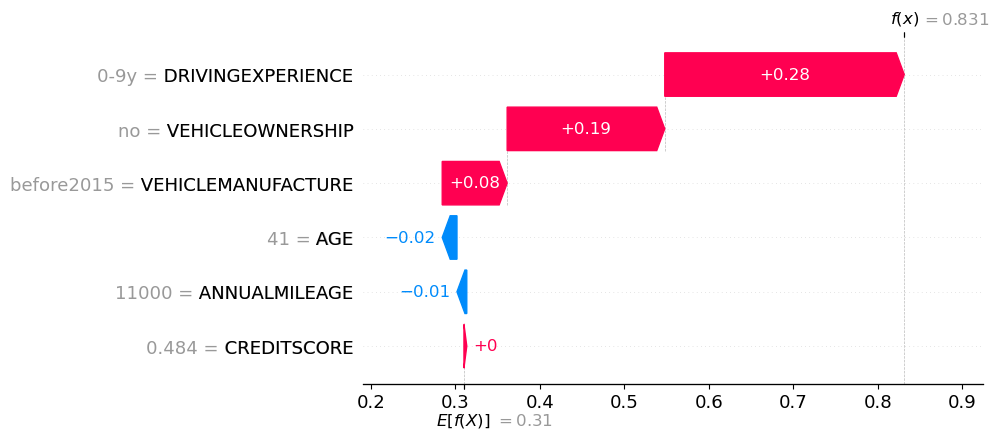

In [25]:
# Create an Explanation object for the first instance in the foreground set
explanation = shap.Explanation(values=shap_values_kernel[observation_index],
                               base_values=expl_kernel.expected_value[1],
                               data=X_raw_test.iloc[observation_index])

# Show the SHAP waterfall plot
shap.waterfall_plot(explanation)

The SHAP waterfall plot reveals that the specific prediction of 0.83 is comprised of the model's base probability of 0.31 plus the influence of various features. The `DRIVINGEXPERIENCE` of 0 to 9 years is the largest contributor, increasing the prediction by 0.28, while not owning a vehicle adds 0.19 to the predicted probability. An older vehicle manufacture date modestly raises the prediction. On the other hand, the individual's age slightly reduces the likelihood of a claim, and the `ANNUALMILEAGE` has a negligible negative impact. The `CREDITSCORE` shows no discernible effect on this prediction.

SHAP's local interpretations can be aggregated to provide a global perspective on explainability. The upcoming figure features a SHAP summary plot on the right, wherein the SHAP values of all instances are plotted together. By taking the absolute values of these SHAP values and computing their average, we obtain a measure of feature importance for each feature. On the left side of the figure, we present a plot that displays these aggregated feature importances across all features. This approach facilitates a comprehensive understanding of the most influential factors in the model.

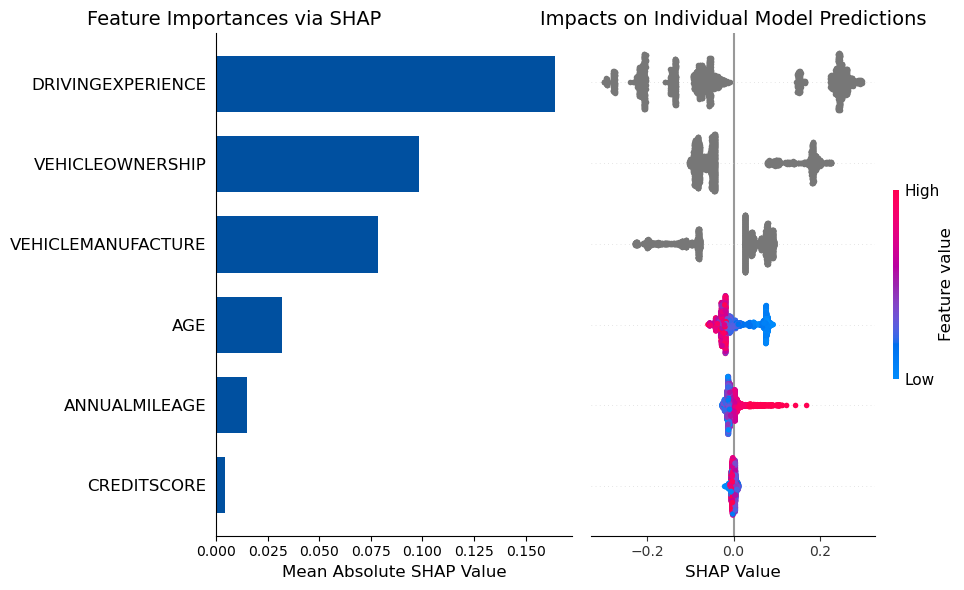

In [26]:
# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values_kernel).mean(0)

fig = plt.figure()
ax0 = fig.add_subplot(121)
shap.bar_plot(mean_abs_shap_values, 
              feature_names=X_raw_test.columns, show=False)

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    # Ignore last Rectangle
    for fcc in fc.get_children()[:-1]:
        if isinstance(fcc, matplotlib.patches.Rectangle):
            if matplotlib.colors.to_hex(fcc.get_facecolor()) == "#ff0051":
                fcc.set_facecolor(COLOR_DARK)
        elif isinstance(fcc, plt.Text):
            if matplotlib.colors.to_hex(fcc.get_color()) == "#ff0051":
                fcc.set_color(COLOR_DARK)

# Create the plot
title_obj = plt.title('Feature Importances via SHAP', fontsize=14)
pos = title_obj.get_position()
title_obj.set_position([0.0495, pos[1]])
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=12)
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
ax1 = fig.add_subplot(122)
shap.summary_plot(shap_values_kernel, X_raw_test, show=False)
plt.gcf().axes[-1].set_aspect(30)
plt.title('Impacts on Individual Model Predictions', fontsize=14)
plt.xlabel('SHAP Value', fontsize=12)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_yticklabels([])
ax1.set_ylim(-0.61, 5.6)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

The global SHAP feature importances reveal that `DRIVINGEXPERIENCE` has the highest influence on model predictions, with `VEHICLEOWNERSHIP` and `VEHICLEMANUFACTURE` also being significant contributors. `AGE` and `ANNUALMILEAGE` have lesser impacts, and `CREDITSCORE` is the least influential. These results largely correspond with Permutation Feature Importance outcomes (see [Subsection 4.4](#permutation-feature-importance)), with the exception of the relative rankings of `AGE` and `ANNUALMILEAGE`. This consistency across different XAI methods strengthens the trust in these features' importances, despite the minor ranking discrepancy for `AGE` and `ANNUALMILEAGE`.

Next, we turn to SHAP dependence plots, a valuable tool for examining the effect of a single feature on model predictions and pinpointing potential interactions with other features. We use this plot to analyze how the `AGE` feature impacts claim predictions from our CatBoost model and investigate if this effect varies with the `VEHICLEOWNERSHIP`. The code below produces a dependence plot for `AGE`, with data points colored based on `VEHICLEOWNERSHIP` values, offering insight into the interaction between these two features.

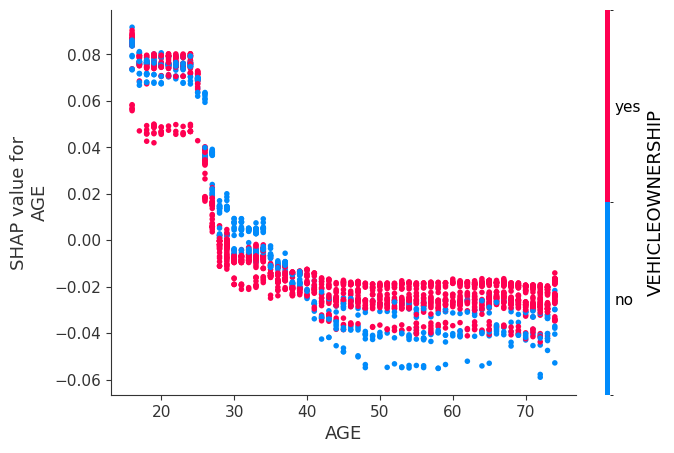

In [27]:
# Create and display the SHAP dependence plot for 'AGE' and 'VEHICLEOWNERSHIP'
shap.dependence_plot(
    'AGE', shap_values_kernel, X_raw_test, interaction_index='VEHICLEOWNERSHIP'
)

In the SHAP dependence plot, we observe that for older individuals, the absence of vehicle ownership is associated with a more substantial negative impact on the prediction of a claim. This interaction indicates that as age increases, the lack of a car becomes a more significant factor in reducing the predicted probability of filing a claim.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of SHAP:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Strong Theoretical Fundament</u>:<br>
        SHAP values adhere to a consistent attribution of contributions across features, drawing from cooperative game theory to provide a fair and stable distribution of predictive 'credits'.</li>
        <li style="margin-bottom: 14px"><u>Detailed Insights for Individual Predictions</u>:<br>
        SHAP allows for a deep dive into the decision-making process for individual data points, offering specific, nuanced explanations rather than broad generalizations.</li>
        <li style="margin-bottom: 14px"><u>Intuitive Visualizations</u>:<br>
        SHAP's visual tools, like the waterfall plot, provide clear and intuitive visual representations of feature contributions, facilitating easier communication and understanding of model behavior for various audiences.</li>
        <li style="margin-bottom: 14px"><u>Local to Global Explainability</u>:<br>
        While SHAP provides explanations for individual predictions, these local explanations can be aggregated to quantify global feature importance, offering insights into the model’s overall behavior.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Computational Intensity</u>:<br>
        Computing SHAP values, especially with methods like `KernelExplainer`, can be computationally expensive, posing challenges with large datasets or complex models.</li>
        <li style="margin-bottom: 14px"><u>Complexity for End-Users</u>:<br>
        While visualizations are intuitive, the underlying concept of SHAP and the interpretation of individual contributions can be complex for end-users without a technical background.</li>
    </ul>
</div>

<h1 id="local-interpretable-model-agnostic-explanations"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    5.2 Local Interpretable Model-Agnostic Explanations (LIME)
    <a class="anchor-link"
       href="#local-interpretable-model-agnostic-explanations"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Local Interpretable Model-Agnostic Explanations (LIME), introduced in [[8]](#references_8), is designed to approximate a given black box model locally by an interpretable model, such as a logistic regression or decision tree, that is easier to understand. By doing so, LIME provides explanations for individual predictions (local explanations), revealing which features are most important for the model's decision in a neighborhood of the particular instance of interest.

<i>Operational Details:</i>

The calculation process for a LIME explanation involves several steps. Given an instance for which we seek an explanation, LIME generates a set of new samples around the instance by perturbing its feature values. It then applies the complex model to these new samples to calculate the corresponding predictions. Next, it weighs these samples according to their proximity to the original instance – samples that are more similar to the original instance have a larger influence. LIME then fits an interpretable model, such as a logistic regression or a decision tree, to the new samples using the calculated predictions and weights. The interpretable model aims to mimic the complex model's behavior in a neighborhood of the instance being explained. The coefficients or structure of this simple model offer insights into which features have the greatest impact on the prediction.

<i>Interpretation:</i>

Interpreting the output of LIME on basis of a logistic regression typically involves looking at the coefficients of the underlying model. In such a case, each coefficient represents the contribution of the corresponding feature to the prediction for the instance at hand. A positive coefficient indicates a feature that contributes to increasing the prediction value, while a negative coefficient indicates a feature that contributes to decreasing it. The magnitude of the coefficient reflects the strength of the feature's influence. While LIME provides valuable insights into individual predictions, it is important to remember that the explanations are local; different models or even slightly different instances can lead to different explanations. Therefore, LIME is best used to explore the model behavior around specific predictions, rather than to derive global conclusions about the model's behavior.

<i>Application to the Car Insurance Dataset:</i>

The `lime` packages used below for the application of LIME requires the input data to be label encoded. As a first step, we hence employ label encoding on our dataset.

In [28]:
# Encode categorical features using LabelEncoder
label_encoders = {feature: LabelEncoder().fit(df_raw[feature]) 
                  for feature in categorical_features}

# Function to transform the dataset using the encoders and inverse transform it
def transform_data(df, label_encoders, inverse=False):
    df_transformed = df.copy()
    for feature, le in label_encoders.items():
        if inverse:
            # Instead of using inverse_transform which can fail with unseen labels,
            # we manually reverse the transformation
            mapping = dict(zip(le.transform(le.classes_), le.classes_))
            df_transformed[feature] = df_transformed[feature].apply(
                lambda x: mapping.get(x, x)
            )
        else:
            try:
                df_transformed[feature] = le.transform(df_transformed[feature])
            except ValueError as e:  # Catch the exception for unseen labels
                # Handle unseen labels - to be determined based on your requirements
                pass
    return df_transformed

# Transform categorical features of the raw dataframe
df_labelenc = transform_data(df_raw, label_encoders)

# Drop the target column to obtain the features DataFrame
X_labelenc = df_labelenc.drop(target, axis=1)

# Create the categorical_names dict with the proper format
categorical_names = {}
categorical_features_indices = []
for feature in categorical_features:
    le = label_encoders[feature]  # Get the LabelEncoder for the feature
    feature_index = X_labelenc.columns.get_loc(feature)  # Get the index
    categorical_features_indices.append(feature_index)
    categorical_names[feature_index] = dict(
        zip(le.transform(le.classes_), le.classes_)
    )

# Use the same train test split as before
X_labelenc_train, X_labelenc_test, _, _ = train_test_split(
    X_labelenc, y, train_size=TRAIN_RATIO, stratify=y, random_state=RANDOM_SEED
)

Next, we apply LIME to obain an explanation of the considered intance of interest.

In [29]:
# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    X_labelenc_train.values,
    feature_names=X_labelenc.columns.tolist(),
    mode='classification',
    categorical_features=categorical_features_indices,
    categorical_names=categorical_names,
    kernel_width=3
)

# Create a function to predict with CatBoost on the LIME format data
def predict_fn_LIME(data_array):
    data_df = pd.DataFrame(data_array, columns=X_labelenc_test.columns)
    # Inverse transform the categorical features before prediction
    retransformed_df = transform_data(data_df, label_encoders, inverse=True)
    # Predict probabilities instead of class labels for classification
    probabilities = model_CB_raw.predict_proba(retransformed_df)
    return probabilities

# Apply LIME on a particular instance from the test set
exp = explainer.explain_instance(
    X_labelenc_test.iloc[observation_index].values, predict_fn_LIME
)
exp.show_in_notebook(show_all=True)

The LIME analysis reveals that a short `DRIVINGEXPERIENCE`, lack of `VEHICLEOWNERSHIP`, and an older `VEHICLEMANUFACTURE` date significantly increase the model's prediction. In contrast, `AGE`, `ANNUALMILEAGE`, and `CREDITSCORE` have negligible impacts on the prediction for this individual.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of LIME:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages:</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Intuitive Explanations Using White Box Models Locally</u>:<br>
        LIME explains individual predictions by using an interpretable white box model. This makes the complex underlying model's behavior transparent and easy to understand, helping users see the factors influencing a specific prediction.</li>
        <li style="margin-bottom: 14px"><u>Flexibility for Different Types of Data</u>:<br>
        LIME can be applied to a variety of data types, including tabular data, text, and images, making it useful for a wide range of applications.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages:</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Local Approximations May Not Capture Global Behavior</u>:<br>
        LIME focuses on local explanations and thus might not accurately represent the model's behavior globally or on other instances beyond the one being explained.</li>
        <li style="margin-bottom: 14px"><u>Dependency on Perturbation Strategy</u>:<br>
        The quality of LIME explanations can greatly depend on how the data is perturbed, which can introduce variability in the explanations.</li>
        <li style="margin-bottom: 14px"><u>Computational Complexity</u>:<br>
        Generating explanations for individual predictions can be computationally expensive, especially for very large datasets or in cases where explanations are required in real time.</li>
    </ul>
</div>

<h1 id="individual-conditional-expectation"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    5.3 Individual Conditional Expectation (ICE)
    <a class="anchor-link"
       href="#individual-conditional-expectation"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Individual Conditional Expectation (ICE) plots, proposed by [[9]](#references_9), offer a detailed view on the relationship between a feature of interest and model predictions for individual instances. While Partial Dependence Plots (PDPs) provide an averaged view across the dataset, ICE plots drill down to how the model's prediction changes for an individual observation when the feature value changes, keeping all other features for that instance constant. ICE plots are particularly useful for uncovering interactions and heterogeneity of feature effects that PDPs might obscure due to averaging.

<i>Operational Details:</i>

The calculation of ICE plots involves the following process: For a specific data instance, we vary the feature of interest over its range while keeping all other features fixed at their original values. We then compute the prediction for each of these modified instances. Repeating this for the entire range of the feature's values, we trace out a line that shows how the prediction changes with the feature values for that instance. An ICE plot consists of one such line for each instance in the dataset – or for a representative sample if the dataset is very large – resulting in multiple lines overlaying each other in the plot.

<i>Relation to Other XAI Methods:</i>

ICE and PDP are interconnected techniques. While PDP represents the averaged effect of a feature on model predictions across the dataset, ICE provides a granular view by showing this relationship for each instance separately. Specifically, a PDP is essentially the average of the individual lines found in an ICE plot. This averaging process in PDPs can obscure individual variations, which ICE plots can highlight. Thus, PDPs are ideal for understanding the general, average influence of a feature, whereas ICE plots are excellent for uncovering the variability and interactions of feature effects at the instance level. Combining both methods offers a more comprehensive understanding of model behavior: PDPs revealing the global average effects and ICE plots detailing local, instance-specific effects.

<i>Interpretation:</i>

When interpreting ICE plots, each line represents the predicted outcome for a particular instance as the value of the feature of interest varies. On the $y$-axis, we have the predicted probability, and the $x$-axis represents the values of the feature of interest. A steep slope in an individual line suggests a strong sensitivity of the prediction to the feature for that specific instance. Diverging lines across the plot can indicate potential interactions between the variable of interest and other variables, or they might reveal that the model behaves differently for different subsets of the data. A bundle of lines moving together in a consistent fashion suggests a relatively uniform effect of the feature across the instances.

<i>Application to the Car Insurance Dataset:</i>

We demonstrate ICE plots for the numerical features in our dataset. Additionally, the respective pointwise average of the ICE plots is also displayed, which coincides with the PDP. 

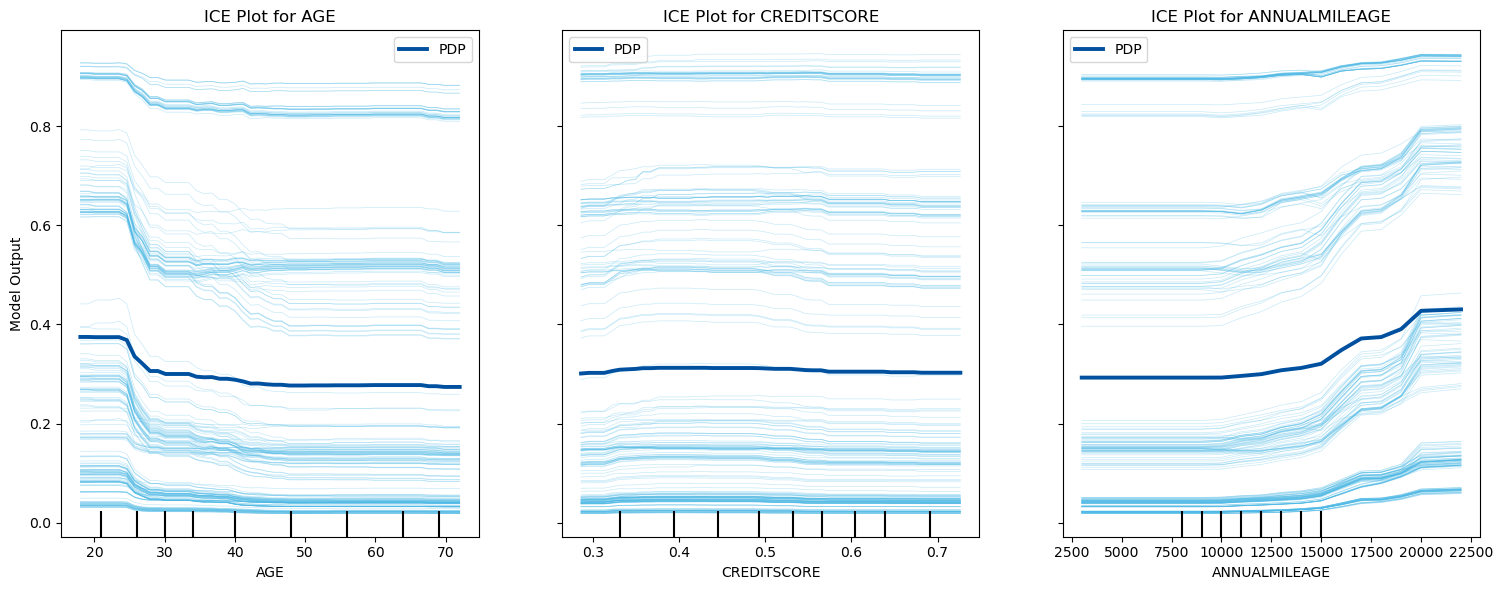

In [30]:
# Determine the positions (indices) of the numerical features in X_raw_test
feature_indices = [
    X_raw_test.columns.get_loc(name) for name in numerical_features
]

# Create the Partial Dependence Plot (PDP)
display = PartialDependenceDisplay.from_estimator(
    model_CB_raw, X_raw_test, features=feature_indices, kind='both', 
    n_cols=3, grid_resolution=50, subsample=0.1,
    pd_line_kw={'color': COLOR_DARK, 'linewidth': 2.8,
                'linestyle': '-', 'label': 'PDP'}, 
    ice_lines_kw={'color': COLOR_LIGHT}
)

# Set the figure size
display.figure_.set_size_inches(15, 6)

# Customize the display
for i, axi in enumerate(display.axes_.ravel()):
    axi.set_title(f'ICE Plot for {numerical_features[i]}')
    axi.set_ylabel("Model Output" if i == 0 else "")  
    axi.set_xlabel(numerical_features[i])

plt.tight_layout()
plt.show()

The ICE plot for `AGE` exhibits a general downward trend in predictions past 25 years, indicating increasing age may lower the predicted outcome. Some variations exist, with certain individuals showing steady predictions regardless of age, while others experience declines, hinting at interactions with other variables.
For `CREDITSCORE`, most ICE plots are flat, suggesting the feature may not substantially influence the model's predictions across different instances, or its effect is overshadowed by other factors.
`ANNUALMILEAGE` ICE plots begin with a stable section, after which predictions start to ascend, showing that mileage has a non-linear effect on the outcome. The magnitude of this increase varies, indicating that the influence of `ANNUALMILEAGE` on predictions is not consistent across all instances and may interact with other features.

ICE plots for categorical features are omitted due to the lack of support in `PartialDependenceDisplay` and to maintain focus on key concepts.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of ICE:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Visualizes Individual Predictive Paths</u>:<br>
        Each line on an ICE plot corresponds to the predictive path of an individual instance across a range of feature values, enabling the analysis of predictions at the individual level rather than at an aggregated level.</li>
        <li style="margin-bottom: 14px"><u>Detects Heterogeneity of Effects</u>:<br>
        ICE plots illustrate how the model’s predictions change for individual observations when a feature's value is altered, thus revealing the variability of the effects of a feature across different data points.</li>
        <li style="margin-bottom: 14px"><u>Reveals Feature Interactions</u>:<br>
        With ICE plots, one can potentially discover interactions between features since they can show how the model responds to changes in a feature for each instance, including when other features are affecting the outcome.</li>
        <li style="margin-bottom: 14px"><u>Complements Aggregated Methods</u>:<br>
        When used alongside PDPs, ICE plots offer a more comprehensive understanding of the model by providing insight into both the average prediction and the distribution of predictions across individuals.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Can Be Overwhelming</u>:<br>
        An ICE plot with a large number of lines can be overwhelming and difficult to interpret, especially with large datasets where it becomes challenging to visually distinguish between the effects of different instances.</li>
        <li style="margin-bottom: 14px"><u>Potential for Misinterpretation</u>:<br>
        The presence of widely divergent lines can make it difficult to draw clear conclusions about feature effects, and observers may misinterpret the variance across lines as noise rather than true heterogeneity.</li>
        <li style="margin-bottom: 14px"><u>Sensitivity to Outliers</u>:<br>
        ICE plots can be sensitive to outliers or extreme values, which may skew the visualization and potentially lead to misinterpretation if not addressed properly.</li>
    </ul>
</div>

<h1 id="counterfactual-explanations"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    5.4 Counterfactual Explanations
    <a class="anchor-link"
       href="#counterfactual-explanations"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Counterfactual explanations, as described in [[10]](#references_10), show the minimal changes needed to alter a model's prediction for a specific instance. This approach is especially useful for understanding "near-miss" cases — situations where an instance was close to receiving an alternate prediction. By identifying the minimal adjustments to an instance's feature values that would change the prediction, counterfactual explanations can provide actionable insights for achieving a desired outcome.

<i>Operational Details:</i>

To generate a counterfactual explanation, we begin with an instance that received a specific prediction and identify the smallest possible changes to its features that would alter the model's decision. This search can be performed in several ways, such as simple sampling or brute-force methods; however, it is generally more efficient to use an optimization-based approach. In this optimized approach, a cost function evaluates the overall change in feature values between the original and modified instance, balancing adjustments for both numerical and categorical features. This results in a counterfactual explanation that identifies only the minimal, targeted changes needed to achieve the desired prediction, offering insights into how small modifications to specific features can influence the model's decision.

<i>Interpretation:</i>

Interpreting counterfactual explanations involves analyzing the changes in feature values and understanding the direction of those changes required to alter the model's prediction. In the context of car insurance, a counterfactual explanation might indicate that if the driver's annual mileage were reduced by a certain amount, the model would have predicted that they would not file a claim. These explanations can be visualized as points near the decision boundary, illustrating the smallest changes needed to shift the prediction. By examining counterfactuals across instances, we gain insights into which features are most influential in the model's decisions, helping to understand how real-world outcomes might change with different inputs.

<i>Application to the Car Insurance Dataset:</i>

The following code generates five counterfactual explanations that illustrate which feature values need to be modified to achieve the opposite prediction.

In [31]:
# Create DiceML data and model objects, and initialize the Dice explainer
dice_data = dice_ml.Data(
    dataframe=pd.concat([X_raw_train, y_train], axis=1),
    continuous_features=numerical_features,
    outcome_name='CLAIM'
)
dice_model = dice_ml.Model(model=model_CB_raw, backend="sklearn")
explainer = dice_ml.Dice(dice_data, dice_model, method="random")

# Generate counterfactual explanations for the specified instance
e1 = explainer.generate_counterfactuals(
    X_raw_test[observation_index:(observation_index + 1)],
    total_CFs=5,
    diversity_weight=7.0,
    desired_class="opposite"
)

# Visualize the generated counterfactuals as a DataFrame showing only changes
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

Query instance (original outcome : 1)


AGE DRIVINGEXPERIENCE  CREDITSCORE  ANNUALMILEAGE VEHICLEOWNERSHIP  \
0   41              0-9y        0.484        11000.0               no   

  VEHICLEMANUFACTURE  CLAIM  
0         before2015      1


Diverse Counterfactual set (new outcome: 0.0)


AGE DRIVINGEXPERIENCE CREDITSCORE ANNUALMILEAGE VEHICLEOWNERSHIP  \
0     -              30+y       0.484             -                -   
1     -                 -      0.1538             -                -   
2     -              30+y       0.484             -                -   
3     -            10-19y      0.4802             -                -   
4  56.0            20-29y       0.484             -                -   

  VEHICLEMANUFACTURE CLAIM  
0                  -     0  
1          since2015     0  
2                  -     0  
3                  -     0  
4                  -     0

In the results, we observe that two to several feature values needed modification to achieve the opposite prediction for the considered instance, such as changes in `ANNUALMILEAGE`, `CREDITSCORE`, or `DRIVINGEXPERIENCE`. The method's randomness, however, can sometimes yield implausible counterfactuals, such as young drivers having extensive driving experience or changes in variables beyond the individual's control.

<i>Advantages and Disadvantages:</i>

At the end of this section, we list several advantages and disadvantages of Counterfactual Explanations:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>User-Friendly Explanations</u>:<br>
        Counterfactual explanations are easily understood by non-expert users as they relate closely to human reasoning and decision-making processes by offering clear narratives on altering outcomes.</li>
        <li style="margin-bottom: 14px"><u>Facilitates Actionable Changes</u>:<br>
        They provide specific and actionable instances that can directly lead to a desired outcome, which is particularly useful for end-users who need to understand the steps to change a decision.</li>
        <li style="margin-bottom: 14px"><u>Compliant with Regulations</u>:<br>
        Counterfactual explanations can assist in fulfilling legal obligations such as the right to explanation in the General Data Protection Regulation (GDPR) by detailing the specific conditions under which a decision would change.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Existence and Uniqueness Challenges</u>:<br>
        Finding a valid counterfactual can be difficult, and multiple conflicting counterfactuals can arise for the same instance, which complicates the understanding of the actual changes needed for a different outcome.</li>
        <li style="margin-bottom: 14px"><u>Computational Demand</u>:<br>
        The search for the nearest counterfactual instance can be computationally expensive, particularly for complex models and large feature spaces.</li>
        <li style="margin-bottom: 14px"><u>Limited Scope</u>:<br>
        Counterfactual explanations focus on single instances and do not provide a comprehensive understanding of the model's overall behavior, potentially overlooking systemic issues or biases.</li>
        <li style="margin-bottom: 14px"><u>Ethical and Feasibility Concerns</u>:<br>
        Without careful construction, counterfactual explanations might suggest changes that are impossible or unethical, such as altering inherently unchangeable characteristics.</li>
    </ul>
</div>

<h1 id="anchors"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    5.5 Anchors
    <a class="anchor-link"
       href="#anchors"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

<i>Main Idea:</i>

Anchors, introduced in [[11]](#references_11), is an XAI method that seeks to explain individual predictions of complex models by identifying sets of "if-then" rules, or so-called anchors. These rules are conditions on the feature values that are sufficient for the model to make the same prediction, regardless of the values of the other features. Essentially, anchors are a form of local, rule-based explanation that aims to articulate the "reasons" behind a specific decision by the model, highlighting which features are most determinative.

<i>Operational Details:</i>

The calculation of anchors involves an algorithm that probabilistically explores the feature space around a given instance to find a set of conditions that, when met, lead to the same prediction with high probability. The algorithm iteratively refines these conditions until it achieves a high level of prediction accuracy, ensuring the rule is as specific as possible while still being broadly applicable within the perturbed feature space.

<i>Relation to Other XAI Methods:</i>

Anchors and Counterfactual Explanations (see [Subsection 5.4](#counterfactual-explanations)) both provide local insights into model predictions but differ in their approach. Counterfactual Explanations identify the minimal changes needed in feature values to alter a prediction. They focus on "what needs to change" for the outcome to be different. In contrast, Anchors offer "if-then" rules, identifying the feature conditions that, if met, will ensure the same prediction, explaining the stability of the model's decision.While Counterfactual Explanations are useful for understanding how to influence a prediction, Anchors clarify which conditions drive consistent predictions. These methods complement each other, with Counterfactuals showing how to change outcomes and Anchors explaining the rules that keep them stable.

<i>Interpretation:</i>

Interpreting anchors involves understanding the identified conditions in the context of the data and the prediction. Each anchor offers a transparent rule that says, "If these feature conditions apply, then the prediction will be X with high likelihood." Such explanations are valuable in practice as they can either reinforce confidence in the prediction when the conditions are sensible or invite scrutiny if the conditions seem counterintuitive or too restrictive.

<i>Application to the Car Insurance Dataset:</i>

The following code demonstrates how to use the anchors explanation method to identify key feature values that strongly influence the prediction for a specific instance.

In [32]:
# Prediction function for Anchors
def predict_fn_Anchors(data_array):
    data_df = pd.DataFrame(data_array, columns=X_labelenc_test.columns)
    # Inverse transform the categorical features before prediction
    retransformed_df = transform_data(data_df, label_encoders, inverse=True)
    # Predict class labels for classification
    predictions = model_CB_raw.predict(retransformed_df)
    return predictions

# Generate a categorical map for categorical features
cat_map = gen_category_map(X_raw_train, categorical_features)

# Initialize the Anchor explainer
explainer = AnchorTabular(
    predict_fn_Anchors,
    feature_names=features_X_raw.tolist(),
    categorical_names=cat_map,
    seed=RANDOM_SEED
)
explainer.fit(X_labelenc_train.values, disc_perc=[25, 50, 75])

# Define class names
class_names = ['No Claim', 'Claim']

# Make a prediction for the instance of interest
prediction = class_names[explainer.predictor(
    X_labelenc_test.values[observation_index].reshape(1, -1)
)[0]]
print('Prediction: ', prediction)

# Explain the prediction using Anchors
explanation = explainer.explain(X_labelenc_test.values[observation_index], 
                                threshold=0.9)
print('Anchor:      %s' % (' AND '.join(explanation.anchor)))
print('Precision:   %.2f' % explanation.precision)
print('Coverage:    %.2f' % explanation.coverage)

Prediction:  Claim
Anchor:      DRIVINGEXPERIENCE = 0-9y AND VEHICLEMANUFACTURE = before2015
Precision:   0.97
Coverage:    0.27


The result shows that the prediction of "Claim" (1) for the input instance is strongly influenced by the conditions "`DRIVINGEXPERIENCE` = 0-9y" and "`VEHICLEMANUFACTURE` = before2015". This anchor rule has a high precision of 0.97, meaning that when these conditions are met, the prediction is correct 97% of the time for similar instances. However, the rule applies to only 27% of the instances in the dataset, indicating its coverage is relatively small.

At the end of this section, we list several advantages and disadvantages of Anchors:

<div style="background-color: #d5ffd9; border-left: 4px solid #569253; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Advantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>High Precision Assurance</u>:<br>
        Anchors provide explanations with a high level of precision, which ensures that the reasons given for a prediction are valid in a substantial proportion of similar cases.</li>
        <li style="margin-bottom: 14px"><u>Easy Interpretability and Actionability</u>:<br>
        The explanations generated by Anchors are easy to interpret and can be directly actionable, offering clear rules or conditions under which the model’s prediction can be trusted.</li>
        <li style="margin-bottom: 14px"><u>Focus on Decision Boundaries</u>:<br>
        By identifying the features that are critical to hold a prediction fixed, Anchors highlight the decision boundaries, providing insight into how robust a prediction is to changes in input data.</li>
        <li style="margin-bottom: 14px"><u>Support for Complex Data Types</u>:<br>
        Anchors are not limited to numerical or categorical data and can be used for more complex data types, such as text and images, making them versatile in terms of the type of data they can explain.</li>
    </ul>
</div>

<div style="background-color: #ffd8d8; border-left: 4px solid #925653; padding-left: 10px; padding-bottom: 1px; padding-top: 6px;">
    <b>Disadvantages</b>
    <ul style="list-style-type: square;">
        <li style="margin-bottom: 14px"><u>Potential for High Complexity in Explanation</u>:<br>
        For some models, the rules generated by Anchors can become very complex, making them difficult for users to understand and apply in practical situations.</li>
        <li style="margin-bottom: 14px"><u>Limited Coverage</u>:<br>
        Anchors explain only the conditions necessary to hold a prediction constant, but they might not explain when these conditions are or are not met, providing a limited view of model behavior.</li>
        <li style="margin-bottom: 14px"><u>Computationally Intensive</u>:<br>
        Finding anchors that satisfy the precision guarantees can be computationally intensive, particularly for larger models and data with high dimensionality.</li>
    </ul>
</div>

<h1 id="limitations-and-outlook" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">6. Limitations and Outlook</h1>

As we conclude our study on applying model-agnostic explainability methods to a car insurance dataset, it is important to acknowledge the limitations of our current approach and identify directions for future research. These limitations and potential research directions are organized into three main topics: the specifics of the task and dataset, the process of machine learning model development and evaluation, and the selection of the explainability techniques we implemented.

<b>Limitations and Outlook regarding the Underlying Task and Dataset:</b>

- This notebook is dedicated to binary classification, presenting a car insurance dataset as a representative use case. Additionally, we offer a separate notebook that addresses regression analysis, and future work on multiclass classification could effectively build upon the binary classification groundwork.

- The dataset showcased in this notebook is composed of structured, tabular data. Prospective studies could extend our work by investigating XAI methods with different data formats, such as text, images, or time series. Expanding the range of data types would both challenge and potentially validate the versatility of the XAI techniques discussed.

<b>Limitations and Outlook regarding Machine Learning Model Development and Evaluation:</b>

- While this notebook did not require complex data preprocessing steps (e.g., handling of missing values, scaling, feature engineering), such operations are typically essential in modeling and can influence both results and interpretations. Further research should examine the interplay between preprocessing techniques and model understanding, especially when applied to datasets with missing values or datasets that have undergone extensive feature engineering.

- The use of machine learning pipelines was not explored here, but incorporating them in future work could standardize and expedite the model development cycle. Pipelines facilitate a seamless transition from data preprocessing to model training, ensuring consistency and reproducibility across experiments.

- Although not addressed in this notebook for the sake of simplicity, hyperparameter tuning is a crucial aspect of model development. It would be valuable to explore the impact of optimized parameters on model performance and the subsequent effects on model explanations in subsequent work.

<b>Limitations and Outlook regarding Employed Explainability Methods:</b>

- While the current emphasis on model-agnostic methods ensures broad applicability, subsequent research could benefit from investigating model-specific explainability techniques. A combined approach integrating both types could yield a more nuanced understanding and offer richer insights into the inner workings of predictive models.

- This study focuses on some of the most established model-agnostic methods, yet a multitude of other techniques remain that could further be investigated. Additionally, the rapidly evolving domain of XAI consistently introduces new methods, presenting a continuous opportunity to enhance our understanding of complex models.

- The robustness of XAI methods' results has not been extensively tested in this notebook. Replicating the analyses with varying random seeds, multiple train-test splits, and a range of hyperparameter settings for XAI techniques would be instrumental in assessing the stability and reliability of the explanatory outcomes derived.

<h1 id="appendix" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">A. Appendix</h1>

<h1 id="adapting-code-to-other-ml-models"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    A.1 Adapting this Notebook's Code to Other Machine Learning Models
    <a class="anchor-link"
       href="#adapting-code-to-other-ml-models"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

We chose CatBoost as our primary machine learning model due to its strong predictive capabilities and native support for categorical features, which makes it an ideal choice for datasets with mixed data types. However, when applying different machine learning models that do not natively handle categorical features, adjustments to the preprocessing steps are necessary.

Below, we illustrate how to adapt the code for an artificial neural network using the `MLPClassifier` implementation from the scikit-learn framework. Specifically, we use a suitable pipeline that includes a preprocessing step to scale the numerical features and handle the categorical data before fitting the machine learning model. The preprocessing step involves using a `ColumnTransformer` to apply one-hot encoding to the categorical features while passing through the numerical features unchanged.

In [33]:
# Create preprocessing steps for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create an artificial neural network via MLPClassifier
model_ANN = MLPClassifier(
    hidden_layer_sizes=(50), learning_rate_init=0.03,
    random_state=RANDOM_SEED, max_iter=1000
)

# Create the pipeline
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('model', model_ANN)]
)

# Fit the pipeline
pipeline.fit(X_raw_train, y_train)

# Evaluate the model on the test set using AUC and accuracy score
auc_ANN_raw = roc_auc_score(
    y_test, pipeline.predict_proba(X_raw_test)[:, 1]
)
acc_ANN_raw = accuracy_score(
    y_test, pipeline.predict(X_raw_test)
)

# Print the AUC and accuracy score
print(f"AUC for the ANN model on the test data:      {auc_ANN_raw:.3f}")
print(f"Accuracy for the ANN model on the test data: {acc_ANN_raw:.3f}")


AUC for the ANN model on the test data:      0.882
Accuracy for the ANN model on the test data: 0.827


The pipeline approach described above can be used for many of the XAI methods discussed in this notebook. However, it's important to note that certain methods may require additional modifications or may not be directly applicable. To demonstrate the exemplary use of the pipeline with a different machine learning model, we implemented the Permutation Feature Importance method from [Subsection 4.4](#permutation-feature-importance) again, using the artificial neural network pipeline instead of the CatBoost model.

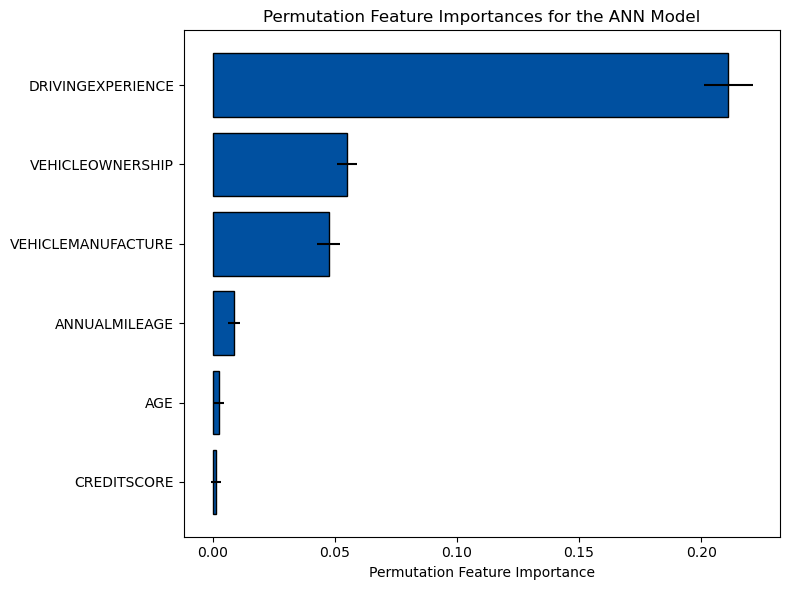

In [34]:
# Perform permutation importance
results = permutation_importance(
    pipeline, X_raw_test, y_test, scoring='roc_auc', 
    n_repeats=1000, random_state=RANDOM_SEED
)

# Sort feature importances in descending order and get their indices
sorted_idx = results.importances_mean.argsort()

# Get the standard deviations for the sorted features
sorted_std = results.importances_std[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(
    range(len(sorted_idx)),
    results.importances_mean[sorted_idx],
    color=COLOR_DARK,
    edgecolor='black',
    xerr=sorted_std,  # Include empirical standard errors
)
plt.yticks(
    range(len(sorted_idx)), 
    [X_raw_test.columns[i] for i in sorted_idx]
)
plt.xlabel("Permutation Feature Importance")
plt.title("Permutation Feature Importances for the ANN Model")
plt.tight_layout()
plt.show()

When comparing the Permutation Feature Importance plot for the Artificial Neural Network with the results from the CatBoost model, we observe a similar ranking of feature importances, though with slight differences in their magnitude. This reinforces the consistency of the findings across different models.

<h1 id="deep-dive-pdp-vs-ale"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    A.2 Deep Dive: PDP vs. ALE
    <a class="anchor-link"
       href="#deep-dive-pdp-vs-ale"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In the actuarial diligence note in [Subsection 4.2](#partial-dependence-plot), we discussed the importance of considering feature independence when applying Partial Dependence Plots and the advantages of using Accumulated Local Effects plots when dealing with correlated features. PDPs can always be calculated, but their interpretation assumes feature independence, which may lead to misleading conclusions when features are correlated, though they are valid when features are independent. ALE plots, on the other hand, do not rely on this assumption and adjust for feature correlations, providing a more accurate view of the data's structure.

Although PDPs and ALE plots can sometimes produce similar visualizations, ALE plots are generally more reliable when feature dependencies are present. This is particularly relevant for our car insurance dataset, where feature independence is not present, as indicated by the correlations discussed in [Section 2](#brief-exploratory-data-analysis). For example, the weak correlation between `AGE` and `ANNUALMILEAGE` suggests that these features are dependent.

In the following, we present a detailed comparison of PDP and ALE plots, exemplarily using the feature `AGE`. This comparison highlights the differences between the results of these two techniques and underscores the importance of considering feature dependencies in model interpretation. Below, we provide the code and resulting plots to visualize these differences.

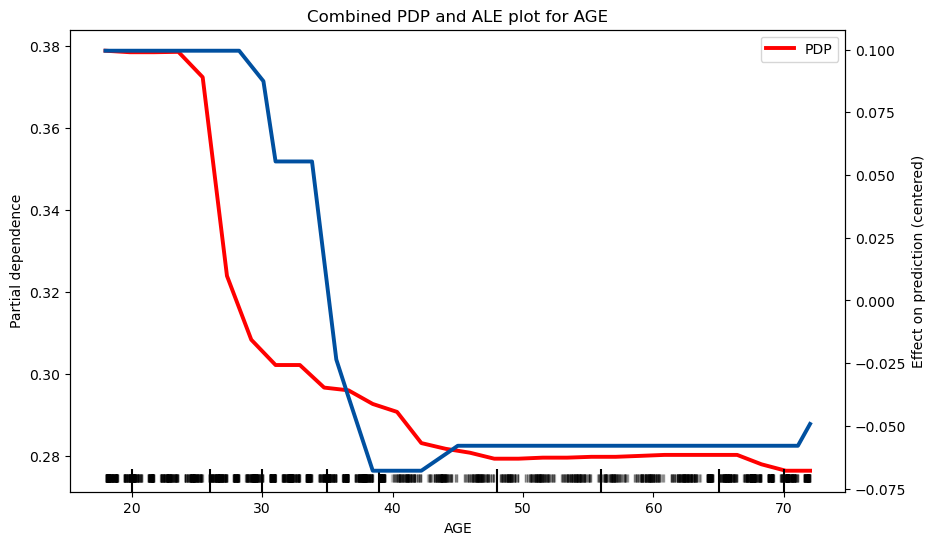

In [35]:
# Set the feature to be considered
feature_name = 'AGE'

# Create the figure for the combined plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Generate PDP with PartialDependenceDisplay.from_estimator
pdp_display = PartialDependenceDisplay.from_estimator(
    model_CB_raw,
    X_raw_train,
    features=[X_raw_test.columns.get_loc(name) for name in [feature_name]],
    kind='average',
    grid_resolution=30,
    feature_names=numerical_features,
    pd_line_kw={'color': 'red', 'linewidth': 2.8, 'linestyle': '-', 'label': 'PDP'},
    ax=ax1
)
pdp_display.axes_[0][0].set_xlabel(feature_name)

# Create a twin axis for ALE
ax2 = ax1.twinx()

# Generate ALE plot
ale_plot = ale(
    X=X_raw_train,
    model=model_CB_raw,
    feature=[feature_name],
    feature_type='continuous',
    grid_size=30,                  
    include_CI=False,
    fig=fig,
    ax=ax2
)

# Adjust line style and color for ALE plot
ax2.lines[0].set_color(COLOR_DARK)
ax2.lines[0].set_linewidth(2.8)
ax2.lines[0].set_label('ALE')

# Remove title for ALE plot
ax2.set_title("")

# Add labels and legend to the original figure
ax1.set_title(f'Combined PDP and ALE plot for {feature_name}')
ax1.set_ylabel('Effect on model output')

plt.show()

In the combined plot comparing PDP and ALE for the feature `AGE`, the PDP shows a smooth, monotonically decreasing line, indicating a general trend of declining model predictions with increasing age. However, the ALE plot exhibits more nuanced behavior, with a steeper decline in the 30 to 40 age range and a slight increase beyond age 40. These differences stem from the fact that PDP averages the effect of `AGE` over all instances, potentially smoothing out interactions and correlations with other features like `CREDITSCORE` and `DRIVINGEXPERIENCE`, whereas ALE accounts for local interactions and dependencies, capturing more detailed variations in the feature's impact.

<h1 id="deep-dive-feature-importance-methods"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    A.3 Deep Dive: Diverse Feature Importance Methods
    <a class="anchor-link"
       href="#deep-dive-feature-importance-methods"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In this notebook, we have explored two model-agnostic methods for calculating feature importances: Permutation Feature Importance, which we have discussed in [Subsection 4.4](#permutation-feature-importance), and feature importance based on mean absolute SHAP values derived in [Subsection 5.1](#shapley-additive-explanations). Comparing the outcomes of these methods is crucial, as it can lend credibility to the results by demonstrating their robustness. This section is dedicated to the comparison of the two mentioned model-agnostic feature importance methods as well as a model-specific technique, namely CatBoost's internal feature importance. More details on how CatBoost calculates its internal feature importance can be found in [[12]](#references_12).

There is no universally perfect method for calculating and interpreting feature importances. However, we will present two visualizations to help assess these values. Prior to this, we calculate the CatBoost internal feature importances and store them, along with the feature importances obtained from PFI and SHAP, in a single data frame.

In [36]:
# Calculate feature importances
internal_feature_importances = model_CB_raw.get_feature_importance()

# Create a DataFrame for all feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features_X_raw,
    'Internal_Importance': internal_feature_importances,
    'PFI_Mean': results.importances_mean,
    'SHAP_Importance': mean_abs_shap_values
}).sort_values(by='Internal_Importance', ascending=False)

First, we will use a grouped bar chart to display the feature importance values from the different methods. Since these methods use different scales, we have kept the original scales for each approach in the plot to show the values as they are, without any adjustments or normalization for direct comparability.

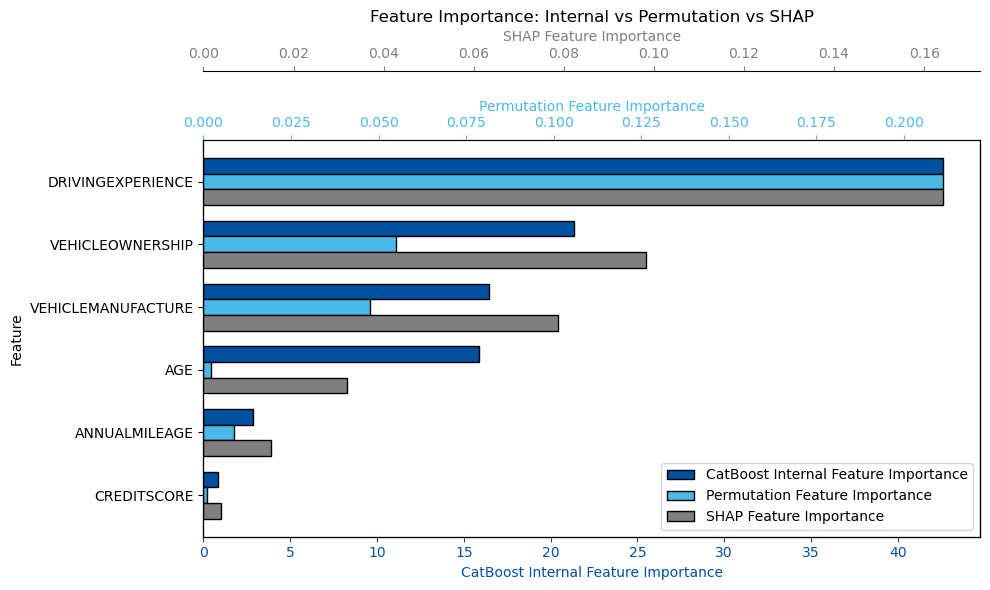

In [37]:
# Plot the feature importances
fig, ax1 = plt.subplots(figsize=(10, 6))

# Calculate bar width and positions
bar_width = 0.25
r1 = np.arange(len(feature_importance_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot internal CatBoost feature importances
bars1 = ax1.barh(r1, feature_importance_df['Internal_Importance'],
                 height=bar_width, color=COLOR_DARK, edgecolor='black',
                 label='CatBoost Internal Feature Importance')

# Create a second x-axis for permutation feature importances
ax2 = ax1.twiny()
bars2 = ax2.barh(r2, feature_importance_df['PFI_Mean'],
                 height=bar_width, color=COLOR_LIGHT, edgecolor='black',
                 label='Permutation Feature Importance')

# Create a third x-axis for SHAP feature importances
ax3 = ax1.twiny()
bars3 = ax3.barh(r3, feature_importance_df['SHAP_Importance'],
                 height=bar_width, color=COLOR_GREY, edgecolor='black',
                 label='SHAP Feature Importance')

# Set labels for the first axis
ax1.set_yticks([r + bar_width for r in range(len(feature_importance_df))])
ax1.set_yticklabels(feature_importance_df['Feature'])
ax1.set_xlabel('CatBoost Internal Feature Importance', color=COLOR_DARK)
ax1.tick_params(axis='x', colors=COLOR_DARK)
ax1.set_ylabel('Feature')
ax1.invert_yaxis()

# Set labels for the second axis
ax2.set_xlabel('Permutation Feature Importance', color=COLOR_LIGHT)
ax2.tick_params(axis='x', colors=COLOR_LIGHT)

# Set labels for the third axis
ax3.spines['top'].set_position(('outward', 50))  # Move the third axis down
ax3.set_xlabel('SHAP Feature Importance', color=COLOR_GREY)
ax3.tick_params(axis='x', colors=COLOR_GREY)

# Align the x-axis at 0 for all axes
ax1.set_xlim(left=0)
ax2.set_xlim(left=0)
ax3.set_xlim(left=0)

# Title and legend
plt.title('Feature Importance: Internal vs Permutation vs SHAP')
ax1.legend(handles=[bars1, bars2, bars3], loc='lower right')

plt.tight_layout()
plt.show()

The benefit of this plot is that it allows comparison of feature ranks across methods and highlights variations in feature importance strengths. Additionally, these differences can be analyzed across all methods. However, a drawback of this visualization is the inherent scale differences among methods; for instance, the CatBoost internal feature importances sum up to 100, while permutation feature importances are linked to AUC reduction, making direct comparisons challenging. In our grouped bar chart, `DRIVINGEXPERIENCE` emerges as consistently the most relevant feature across all methods, followed by `VEHICLEOWNERSHIP` and `VEHICLEMANUFACTURE`. It is worth noting that `AGE` has a relatively low value for PFI but is not as low for the other two methods, which could be due to the strong correlation between `DRIVINGEXPERIENCE` and `AGE`.

Next, we will rank the feature importances for each method and visualize them using a heatmap. This will enable us to identify both similarities and differences in the rankings of the methods.

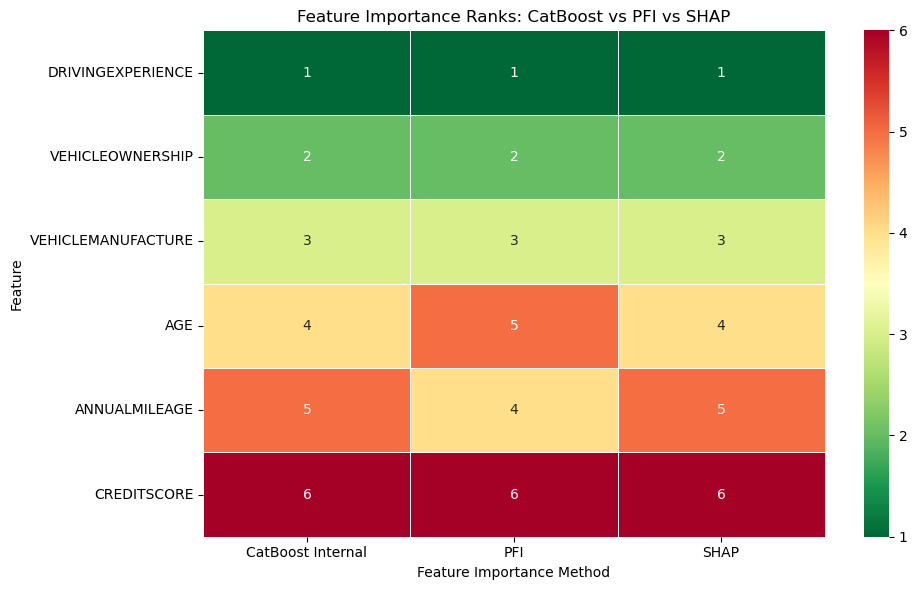

In [38]:
# Calculate ranks for each method
feature_importance_df['CatBoost Internal'] = \
    feature_importance_df['Internal_Importance'].rank(ascending=False)
feature_importance_df['PFI'] = \
    feature_importance_df['PFI_Mean'].rank(ascending=False)
feature_importance_df['SHAP'] = \
    feature_importance_df['SHAP_Importance'].rank(ascending=False)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance_df.set_index('Feature')[['CatBoost Internal', 
                                                        'PFI', 'SHAP']], 
            annot=True, cmap='RdYlGn_r', linewidths=.5)
plt.title('Feature Importance Ranks: CatBoost vs PFI vs SHAP')
plt.xlabel('Feature Importance Method')
plt.ylabel('Feature')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

With the exception of PFI for `AGE`, which was previously discussed, all three methods yield consistent feature importance rankings. Generally, the feature importances remain stable across the different methods.

In summary, it is wise not to rely solely on one method for determining feature importance values, but instead to consider multiple methods and possibly reassess them to ensure robustness.

<h1 id="deep-dive-shap-variants"
    style="font-size:20px; font-weight:bold; margin-top: 10px;">
    A.4 Deep Dive: Variants of SHAP
    <a class="anchor-link"
       href="#deep-dive-shap-variants"
       target="_self"
       rel="noopener noreferrer">
    </a>
    <hr style="border: none; border-top: 3px solid black; margin-top: 10px;">
</h1>

In [Subsection 5.1](#shapley-additive-explanations), we introduced and discussed the XAI method SHAP, noting different methods for calculating Shapley values in an actuarial diligence note. Various SHAP variants address different scenarios and model types, each with unique benefits and computational considerations. Here, we focus on two common variants: <i>Kernel SHAP</i> and <i>Tree SHAP</i>, while acknowledging that many other variants are available for specific needs. For more detailed analyses and comparisons, we refer the interested reader to [[13]](#references_13).

- <i>Kernel SHAP:</i> This model-agnostic variant can be applied to any machine learning model. It uses a weighted linear regression approach to approximate the Shapley values. <i>Kernel SHAP</i> is particularly useful for models without a specific SHAP implementation.
- <i>Tree SHAP:</i> Designed specifically for tree-based models, <i>Tree SHAP</i> leverages the structure of decision trees to compute Shapley values efficiently. It is significantly faster for tree-based models compared to <i>Kernel SHAP</i>.

Differences in SHAP value calculations arise from the underlying algorithms and approximations used by each variant. <i>Kernel SHAP</i> treats the model as a black-box, offering flexibility but at a high computational cost. In contrast, <i>Tree SHAP</i> exploits the internal structure of tree-based models, resulting in more efficient and precise calculations.

Other variants, such as <i>Sampling SHAP</i> and <i>Permutation SHAP</i>, offer increased flexibility for different use-cases and computational constraints, though they are not the focus of this section.

Below, we demonstrate how to create SHAP explainers using <i>Kernel SHAP</i> and <i>Tree SHAP</i>, and compute SHAP values for our CatBoost model.

In [39]:
# Create various SHAP explainers using the training set
# The Kernel SHAP explainer `expl_kernel` was already created above
# expl_kernel = shap.KernelExplainer(model_CB_raw.predict_proba, X_raw_train)
expl_tree = shap.TreeExplainer(model_CB_raw)

# Calculate SHAP values for the test set
# The Kernel SHAP values `shap_values_kernel` were already created above
# shap_values_kernel = expl_kernel.shap_values(X_raw_test)[1]
shap_values_tree   = expl_tree.shap_values(X_raw_test)

To visualize the SHAP values for a specific instance, we create force plots. SHAP force plots visually represent the contribution of each feature to the predicted value, showing how much each feature pushes the prediction from the base value. The visualizations reveal slight differences in SHAP values produced by each variant.

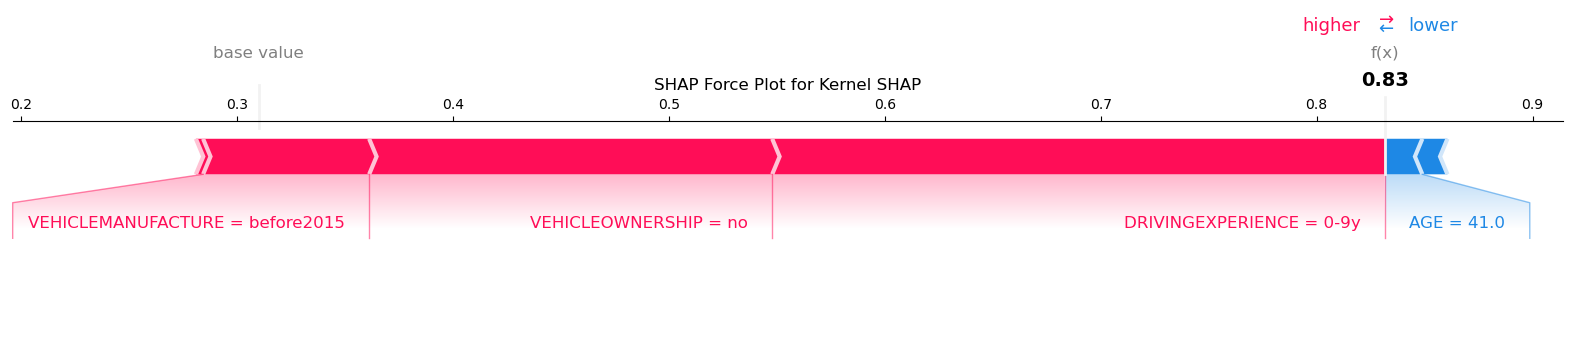

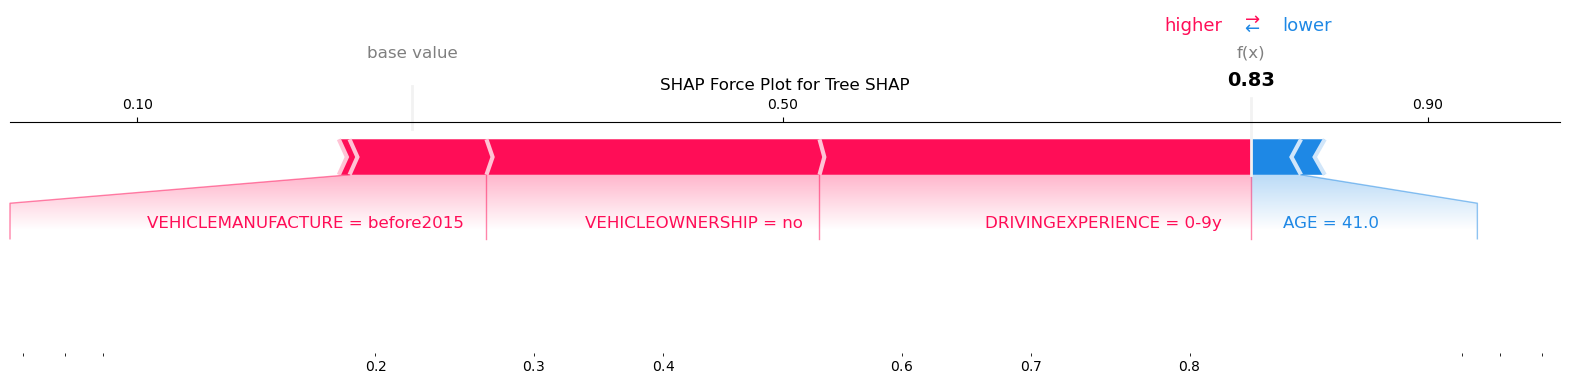

In [40]:
# Create SHAP force plot for Kernel SHAP
shap.force_plot(expl_kernel.expected_value[1],
                shap_values_kernel[observation_index],
                X_raw_test.iloc[observation_index],
                matplotlib=True, show=False)
plt.title("SHAP Force Plot for Kernel SHAP", )
plt.show()

# Create SHAP force plot for Tree SHAP
shap.force_plot(expl_tree.expected_value,
                shap_values_tree[observation_index],
                X_raw_test.iloc[observation_index],
                link='logit', matplotlib=True, show=False)
plt.title("SHAP Force Plot for Tree SHAP")
plt.show()

While the direction and strength of the SHAP values are generally consistent, there are minor variations in the individual feature values and the base value. For CatBoost, <i>Tree SHAP</i> is preferred due to its efficiency and accuracy for tree-based models. The differences between <i>Tree SHAP</i> and <i>Kernel SHAP</i> are typically minimal, with only slight discrepancies in the values.

<h1 id="references" style="font-size:22px; background-color: #E6E6E6; color: black; height: 50px; line-height: 50px; padding-left: 14px;">References</h1>

<a id="references_1"></a>
[1] https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

<a id="references_2"></a>
[2] Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A. V., & Gulin, A. (2018). CatBoost: unbiased boosting with categorical features. *Advances in Neural Information Processing Systems*, 31, 6639–6649.

<a id="references_3"></a>
[3] Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. *Annals of Statistics*, 29(5), 1189–1232.

<a id="references_4"></a>
[4] Molnar, C. (2022). Interpretable Machine Learning: *A Guide for Making Black Box Models Explainable* (2nd ed.). Retrieved from https://christophm.github.io/interpretable-ml-book/

<a id="references_5"></a>
[5] Apley, D. W., & Zhu, J. (2020). Visualizing the Effects of Predictor Variables in Black Box Supervised Learning Models. *Journal of the Royal Statistical Society: Series B (Statistical Methodology)*, 82(4), 1059–1086.

<a id="references_6"></a>
[6] Breiman, L. (2001). Random Forests. *Machine Learning*, 45(1), 5–32.

<a id="references_7"></a>
[7] Lundberg, S. M., & Lee, S.-I. (2017). A Unified Approach to Interpreting Model Predictions. *Advances in Neural Information Processing Systems 30 (NeurIPS 2017)*, 4765–4774.

<a id="references_8"></a>
[8] Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). "Why Should I Trust You?": Explaining the Predictions of Any Classifier. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16)*, 1135–1144.

<a id="references_9"></a>
[9] Goldstein, A., Kapelner, A., Bleich, J., & Pitkin, E. (2015). Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation. *Journal of Computational and Graphical Statistics*, 24(1), 44–65.

<a id="references_10"></a>
[10] Mothilal, R. K., Sharma, A., & Tan, C. (2020). Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations. *Proceedings of the 2020 Conference on Fairness, Accountability, and Transparency (FAT '20)*, 607–617.

<a id="references_11"></a>
[11] Ribeiro, M. T., Singh, S., & Guestrin, C. (2018). Anchors: High-Precision Model-Agnostic Explanations. *Proceedings of the AAAI Conference on Artificial Intelligence*, 32(1).

<a id="references_12"></a>
[12] https://catboost.ai/en/docs/concepts/fstr#internal-feature-importance

<a id="references_13"></a>
[13] Chen, H., Covert, I. C., Lundberg, S. M., & Lee, S.-I. (2022). Algorithms to estimate Shapley value feature attributions. *arXiv preprint arXiv:2207.07605*.